SEX

In [1]:
!pip install matplotlib seaborn pandas numpy --quiet

# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset into a pandas DataFrame
file_name = r'../../6_cleaned_files/vaccine_hesitancy/VH_Sex.csv'
df = pd.read_csv(file_name)


In [2]:
# Data Cleaning and Reshaping
# Converting columns to numeric
for col in df.columns[1:]:  # Skip the first column (Sex)
    # Checking if the column contains string data before applying str methods
    if df[col].dtype == object:  # object dtype often indicates strings
        df[col] = pd.to_numeric(df[col].str.replace(',', '').replace('-', np.nan), errors='coerce')
    else:
        # If not string, handle as numeric or other data type
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Creating a long-format dataset for positive sentiment
positive_sentiment_long = pd.melt(
    df,
    id_vars=['Sex'],
    value_vars=['Positive_Sentiment_JantoMarch2021', 'Positive_Sentiment_AprtoJuly2021'],
    var_name='Time_Period',
    value_name='Positive_Sentiment'
)
positive_sentiment_long['Time_Period'] = positive_sentiment_long['Time_Period'].str.replace(
    'Positive_Sentiment_', '').replace({
        'JantoMarch2021': 'Jan-Mar 2021',
        'AprtoJuly2021': 'Apr-Jul 2021'
    })

# Creating a long-format dataset for vaccine hesitancy
vaccine_hesitancy_long = pd.melt(
    df,
    id_vars=['Sex'],
    value_vars=['Vaccine_Hesitancy_JantoMarch2021', 'Vaccine_Hesitancy_AprtoJuly2021'],
    var_name='Time_Period',
    value_name='Vaccine_Hesitancy'
)
vaccine_hesitancy_long['Time_Period'] = vaccine_hesitancy_long['Time_Period'].str.replace(
    'Vaccine_Hesitancy_', '').replace({
        'JantoMarch2021': 'Jan-Mar 2021',
        'AprtoJuly2021': 'Apr-Jul 2021'
    })

# Combining both datasets for analysis
combined_long = pd.merge(
    positive_sentiment_long, vaccine_hesitancy_long,
    on=['Sex', 'Time_Period'], how='inner'
)

print("\nConsolidated Long Format Data:")
print(combined_long)



Consolidated Long Format Data:
      Sex   Time_Period  Positive_Sentiment  Vaccine_Hesitancy
0    Male  Jan-Mar 2021              7220.4              627.6
1  Female  Jan-Mar 2021              7920.6              581.4
2    Male  Apr-Jul 2021              7056.0              679.0
3  Female  Apr-Jul 2021              7544.0              321.0


In [3]:
# Visualising Consolidated Data
# Setting up the seaborn theme for consistent styling
sns.set_theme(style="whitegrid")

# Function to add numerical labels on bars
def add_labels(ax):
    for bar in ax.patches:
        ax.annotate(
            format(bar.get_height(), '.2f'),  # Format the label to 2 decimal places
            (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Set position
            ha='center', va='center',  # Align horizontally and vertically
            size=10, xytext=(0, 5),  # Offset label slightly above the bar
            textcoords='offset points'
        )

/var/folders/82/02_3g97j3w76bqyztvpl684m0000gn/T/ipykernel_29982/3028373334.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=combined_long, x="Sex", y="Positive_Sentiment", palette="Blues_d")


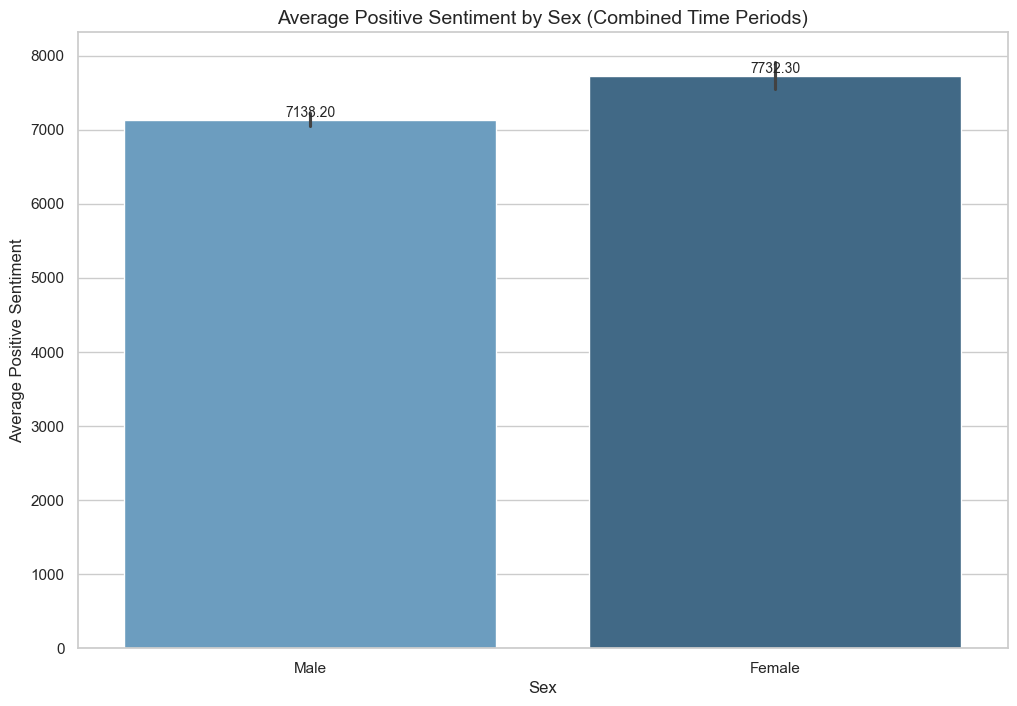

/var/folders/82/02_3g97j3w76bqyztvpl684m0000gn/T/ipykernel_29982/3028373334.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=combined_long, x="Sex", y="Vaccine_Hesitancy", palette="Reds_d")


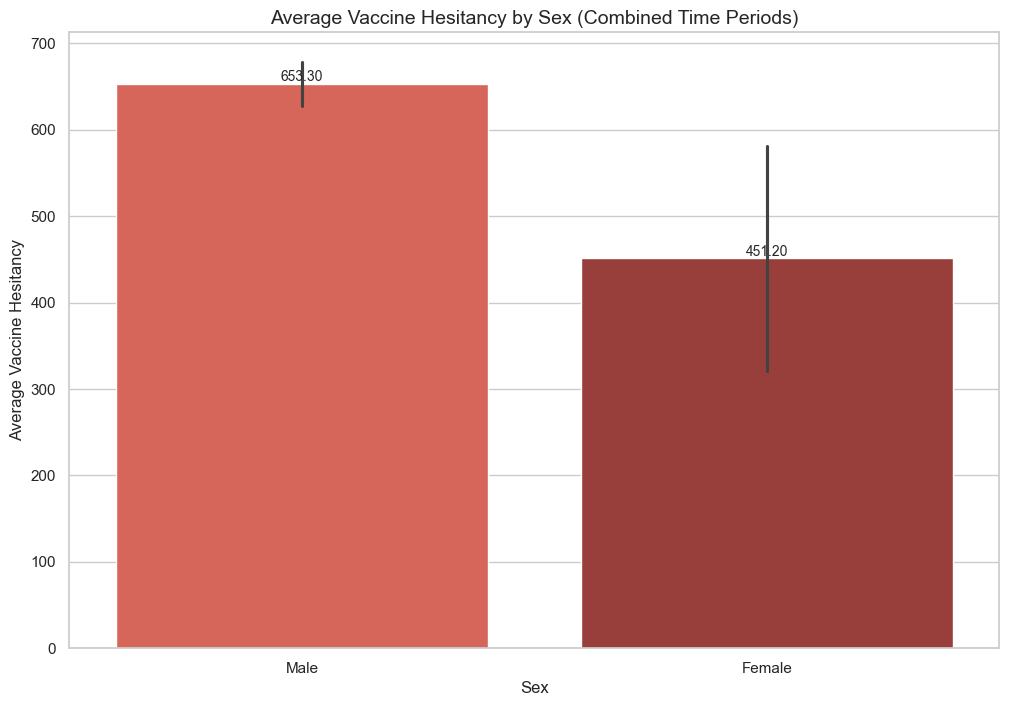

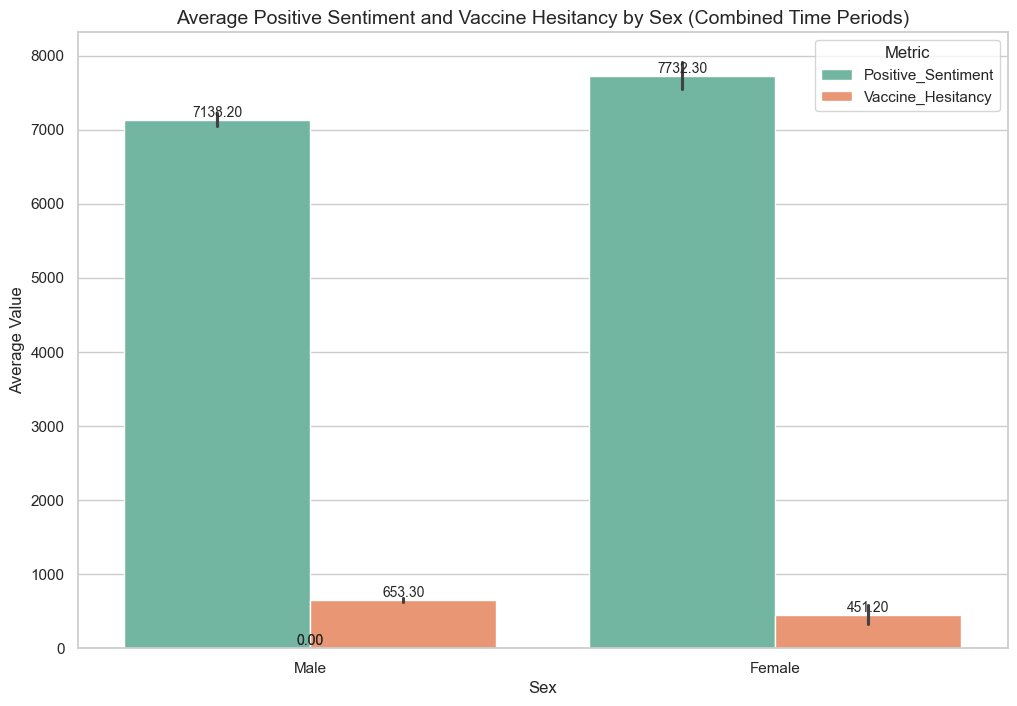

In [4]:
# Visualisations for Combined Data

# Bar Plot: Average Positive Sentiment and Vaccine Hesitancy by Sex
plt.figure(figsize=(12, 8))
# Changed 'consolidated_data' to 'combined_long'
ax = sns.barplot(data=combined_long, x="Sex", y="Positive_Sentiment", palette="Blues_d")
add_labels(ax)  # Add numerical labels
plt.title("Average Positive Sentiment by Sex (Combined Time Periods)", fontsize=14)
plt.ylabel("Average Positive Sentiment")
plt.xlabel("Sex")
plt.show()

plt.figure(figsize=(12, 8))
# Changed 'consolidated_data' to 'combined_long'
ax = sns.barplot(data=combined_long, x="Sex", y="Vaccine_Hesitancy", palette="Reds_d")
add_labels(ax)  # Add numerical labels
plt.title("Average Vaccine Hesitancy by Sex (Combined Time Periods)", fontsize=14)
plt.ylabel("Average Vaccine Hesitancy")
plt.xlabel("Sex")
plt.show()

# Combined Bar Plot for Sentiment and Hesitancy
plt.figure(figsize=(12, 8))
# Changed 'consolidated_data' to 'combined_long'
consolidated_data_melted = pd.melt(
    combined_long,
    id_vars=["Sex"],
    value_vars=["Positive_Sentiment", "Vaccine_Hesitancy"],
    var_name="Metric",
    value_name="Value"
)
ax = sns.barplot(data=consolidated_data_melted, x="Sex", y="Value", hue="Metric", palette="Set2")
add_labels(ax)  # Add numerical labels
plt.title("Average Positive Sentiment and Vaccine Hesitancy by Sex (Combined Time Periods)", fontsize=14)
plt.ylabel("Average Value")
plt.xlabel("Sex")
plt.legend(title="Metric")

plt.savefig('../../8_final_visualisations/vaccine_hesitancy/average_positive_sentiment_by_sex.png', dpi=300)  

plt.show()

/var/folders/82/02_3g97j3w76bqyztvpl684m0000gn/T/ipykernel_24512/4132173603.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


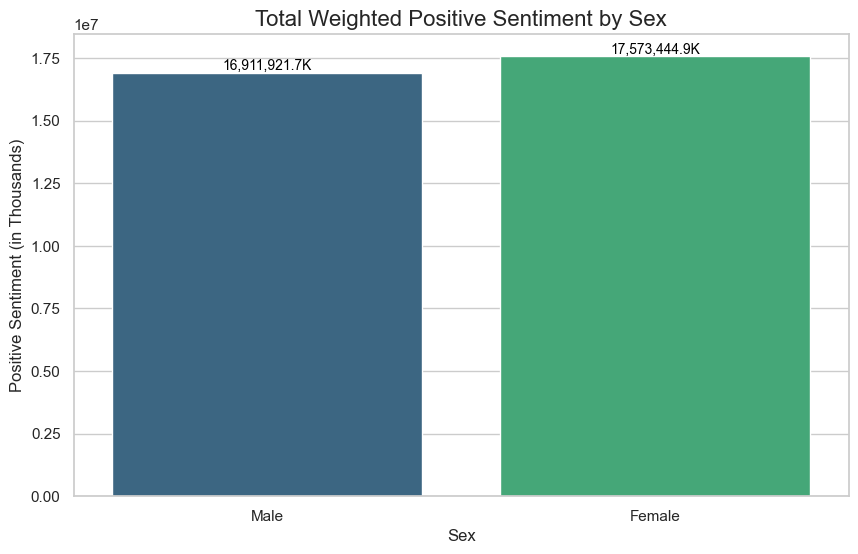

/var/folders/82/02_3g97j3w76bqyztvpl684m0000gn/T/ipykernel_24512/4132173603.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


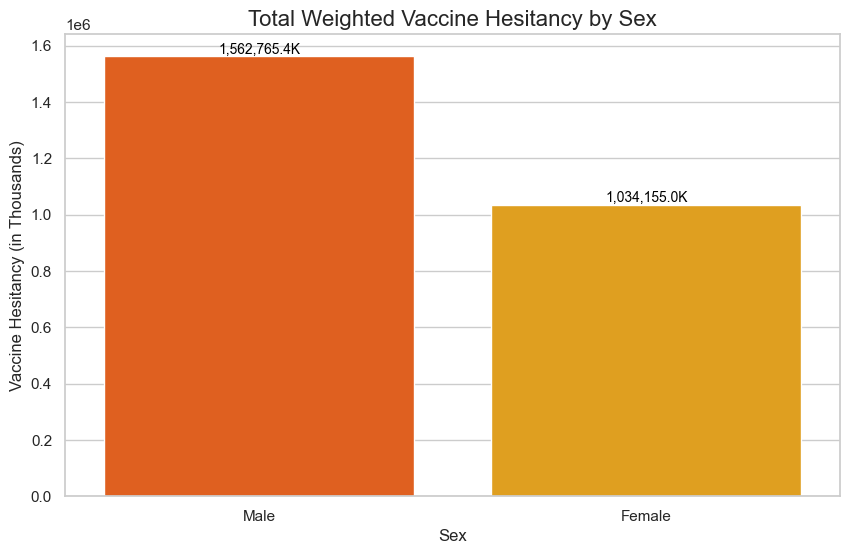

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creating the DataFrame with provided weighted values
data = {
    "Sex": ["Male", "Female"],
    "Positive_Sentiment_JantoMarch2021_Weighted": [8048806.72, 8524086.88],
    "Positive_Sentiment_AprtoJuly2021_Weighted": [8863115, 9049358],
    "Vaccine_Hesitancy_JantoMarch2021_Weighted": [708926.40, 626993.99],
    "Vaccine_Hesitancy_AprtoJuly2021_Weighted": [853839, 407161]
}
df = pd.DataFrame(data)

# Aggregating weighted values for each metric across time periods
df["Positive_Sentiment_Weighted_Total"] = (
    df["Positive_Sentiment_JantoMarch2021_Weighted"] + df["Positive_Sentiment_AprtoJuly2021_Weighted"]
)
df["Vaccine_Hesitancy_Weighted_Total"] = (
    df["Vaccine_Hesitancy_JantoMarch2021_Weighted"] + df["Vaccine_Hesitancy_AprtoJuly2021_Weighted"]
)

# Visualising Positive Sentiment
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df,
    x="Sex",
    y="Positive_Sentiment_Weighted_Total",
    palette="viridis"
)
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():,.1f}K",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center", va="bottom", fontsize=10, color="black"
    )
plt.title("Total Weighted Positive Sentiment by Sex", fontsize=16)
plt.ylabel("Positive Sentiment (in Thousands)")
plt.xlabel("Sex")
plt.show()

# Visualising Vaccine Hesitancy
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df,
    x="Sex",
    y="Vaccine_Hesitancy_Weighted_Total",
    palette="autumn"
)
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():,.1f}K",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center", va="bottom", fontsize=10, color="black"
    )
plt.title("Total Weighted Vaccine Hesitancy by Sex", fontsize=16)
plt.ylabel("Vaccine Hesitancy (in Thousands)")
plt.xlabel("Sex")

plt.savefig('../../8_final_visualisations/vaccine_hesitancy/total_weighted_positive_sentiment_by_sex_bar_chart.png', dpi=300)  

plt.show()








Observations and Insights

Gender-Based Positive Sentiment:
    Females exhibit a higher total positive sentiment compared to males (both in Jan-Mar 2021 and Apr-Jul 2021).
    This trend suggests that females may have had a generally more positive outlook toward vaccination during this timeframe.

Gender-Based Vaccine Hesitancy:

Males show significantly higher vaccine hesitancy than females across the combined timeframe.
This pattern might indicate differences in attitudes, access, or exposure to vaccine-related information.

Proportional Analysis:

 We can calculate the proportion of vaccine hesitancy to positive sentiment for both genders:
 Proportion=Vaccine Hesitancy Weighted TotalPositive Sentiment Weighted Total
 Proportion=Positive Sentiment Weighted TotalVaccine Hesitancy Weighted Total​ This could help determine the level of resistance relative to support for vaccinations.   
    

    

In [9]:
# Calculating Proportion and Ratio
df['Hesitancy_to_Sentiment_Proportion'] = df['Vaccine_Hesitancy_Weighted_Total'] / df['Positive_Sentiment_Weighted_Total']
df['Sentiment_to_Hesitancy_Ratio'] = df['Positive_Sentiment_Weighted_Total'] / df['Vaccine_Hesitancy_Weighted_Total']

print("\nCalculated Proportions and Ratios:")
print(df[['Sex', 'Hesitancy_to_Sentiment_Proportion', 'Sentiment_to_Hesitancy_Ratio']])



Calculated Proportions and Ratios:
      Sex  Hesitancy_to_Sentiment_Proportion  Sentiment_to_Hesitancy_Ratio
0    Male                           0.092406                     10.821792
1  Female                           0.058848                     16.993048


INCOME BANDS

/var/folders/82/02_3g97j3w76bqyztvpl684m0000gn/T/ipykernel_29982/3753477533.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x="Income Band", y="Positive_Weighted_Total", palette="coolwarm")


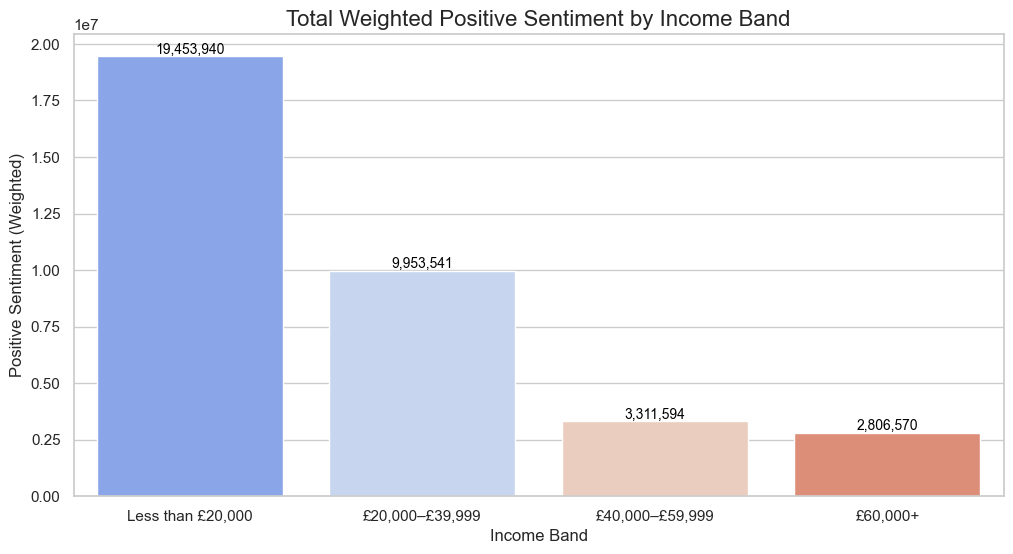

/var/folders/82/02_3g97j3w76bqyztvpl684m0000gn/T/ipykernel_29982/3753477533.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x="Income Band", y="Hesitancy_Weighted_Total", palette="autumn")


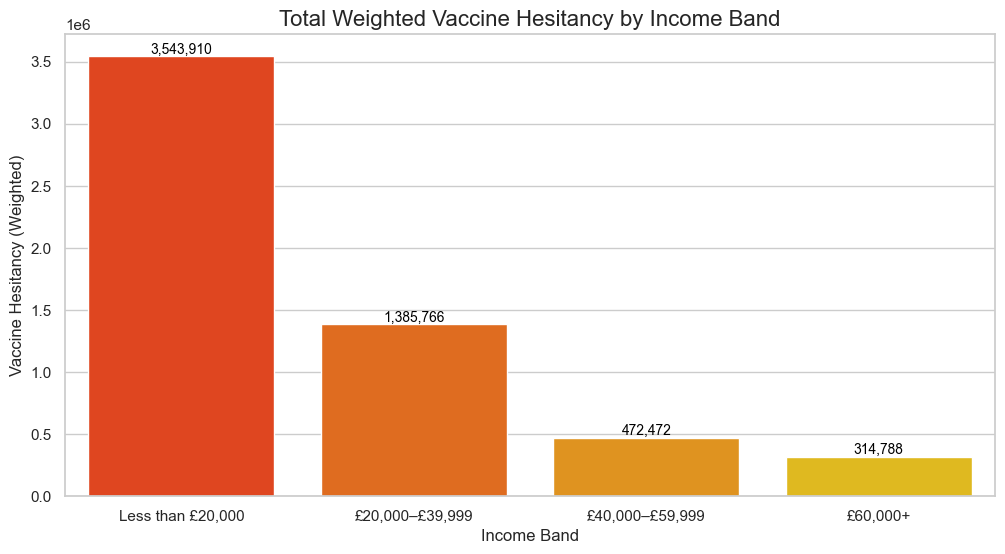

In [5]:
# Importing required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creating the DataFrame
data = {
    "Income Band": ["Less than £20,000", "£20,000–£39,999", "£40,000–£59,999", "£60,000+"],
    "Positive_Weighted_JantoMarch2021": [14975822, 1975091, 490018, 172241],
    "Hesitancy_Weighted_JantoMarch2021": [2623252, 219455, 42611, 9065],
    "Positive_Weighted_AprtoJuly2021": [4478118, 7978450, 2821576, 2634329],
    "Hesitancy_Weighted_AprtoJuly2021": [920658, 1166311, 429861, 305723]
}
df = pd.DataFrame(data)

# Aggregating weighted values into one timeframe
df["Positive_Weighted_Total"] = (
    df["Positive_Weighted_JantoMarch2021"] + df["Positive_Weighted_AprtoJuly2021"]
)
df["Hesitancy_Weighted_Total"] = (
    df["Hesitancy_Weighted_JantoMarch2021"] + df["Hesitancy_Weighted_AprtoJuly2021"]
)

# Step 4: Calculate Proportions and Ratios
df["Hesitancy_to_Sentiment_Proportion"] = (
    df["Hesitancy_Weighted_Total"] / df["Positive_Weighted_Total"]
)
df["Sentiment_to_Hesitancy_Ratio"] = (
    df["Positive_Weighted_Total"] / df["Hesitancy_Weighted_Total"]
)

# Visualising Positive Sentiment by Income Band
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="Income Band", y="Positive_Weighted_Total", palette="coolwarm")
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():,.0f}",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center", va="bottom", fontsize=10, color="black"
    )
plt.title("Total Weighted Positive Sentiment by Income Band", fontsize=16)
plt.ylabel("Positive Sentiment (Weighted)")
plt.xlabel("Income Band")
plt.show()

# Visualising Vaccine Hesitancy by Income Band
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="Income Band", y="Hesitancy_Weighted_Total", palette="autumn")
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():,.0f}",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center", va="bottom", fontsize=10, color="black"
    )
plt.title("Total Weighted Vaccine Hesitancy by Income Band", fontsize=16)
plt.ylabel("Vaccine Hesitancy (Weighted)")
plt.xlabel("Income Band")

plt.savefig('../../8_final_visualisations/vaccine_hesitancy/total_weighted_positive_sentiment_by_income_band.png', dpi=300)  

plt.show()

/var/folders/82/02_3g97j3w76bqyztvpl684m0000gn/T/ipykernel_29982/3604294447.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x="Income Band", y="Hesitancy_to_Sentiment_Proportion", palette="viridis")


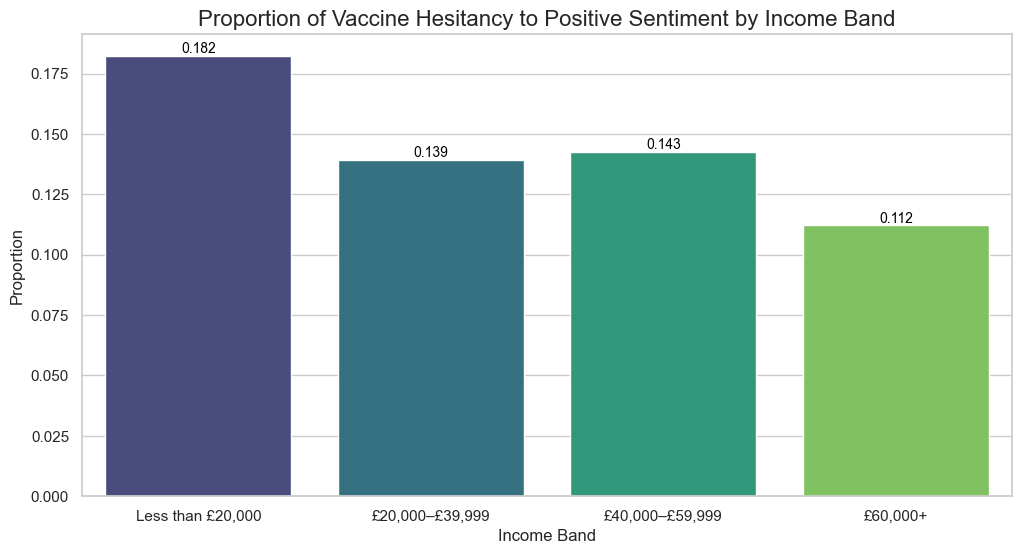

In [6]:
# Visualising Proportions
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="Income Band", y="Hesitancy_to_Sentiment_Proportion", palette="viridis")
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.3f}",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center", va="bottom", fontsize=10, color="black"
    )
plt.title("Proportion of Vaccine Hesitancy to Positive Sentiment by Income Band", fontsize=16)
plt.ylabel("Proportion")
plt.xlabel("Income Band")

plt.savefig('../../8_final_visualisations/vaccine_hesitancy/proportion_vaccine_hesitancy_to_positive_sentiment_by_income_band_barchart.png', dpi=300)  

plt.show()

In [12]:
# Correlation Analysis
correlation = df[["Positive_Weighted_Total", "Hesitancy_Weighted_Total"]].corr()
print("\nCorrelation Between Positive Sentiment and Vaccine Hesitancy:")
print(correlation)


Correlation Between Positive Sentiment and Vaccine Hesitancy:
                          Positive_Weighted_Total  Hesitancy_Weighted_Total
Positive_Weighted_Total                  1.000000                  0.993632
Hesitancy_Weighted_Total                 0.993632                  1.000000


/var/folders/82/02_3g97j3w76bqyztvpl684m0000gn/T/ipykernel_29982/4203989090.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x="Income Band", y="Sentiment_to_Hesitancy_Ratio", palette="pastel")


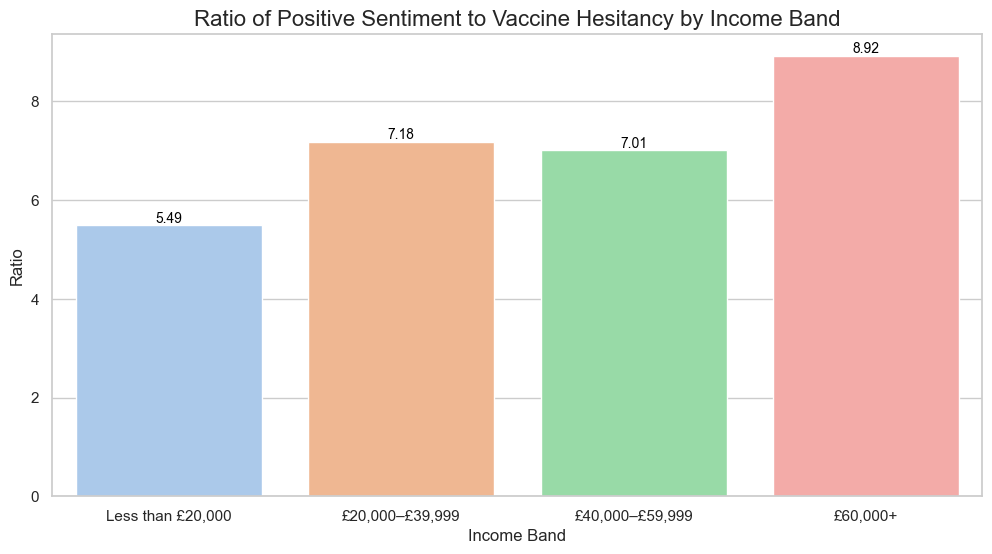

In [7]:
# Ratio of Sentiment to Vaccine Hesitancy

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="Income Band", y="Sentiment_to_Hesitancy_Ratio", palette="pastel")
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.2f}",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center", va="bottom", fontsize=10, color="black"
    )
plt.title("Ratio of Positive Sentiment to Vaccine Hesitancy by Income Band", fontsize=16)
plt.ylabel("Ratio")
plt.xlabel("Income Band")

plt.savefig('../../8_final_visualisations/vaccine_hesitancy/ration_positive_sentiment_to_vaccine_hesitancy_by_income_band_barchart.png', dpi=300)  

plt.show()

/var/folders/82/02_3g97j3w76bqyztvpl684m0000gn/T/ipykernel_29982/2840654594.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x="Employment Status", y="Hesitancy_to_Sentiment_Proportion", palette="viridis")


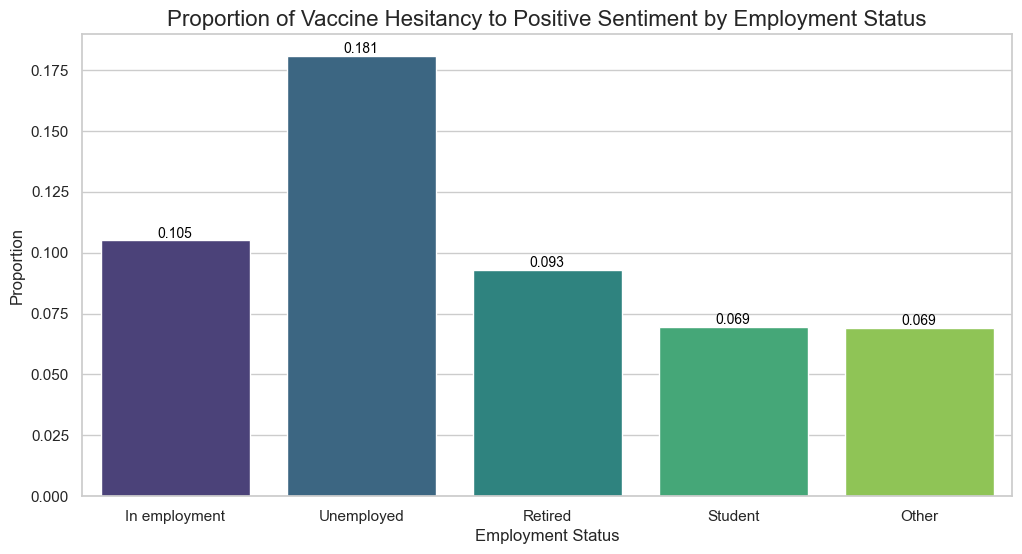

/var/folders/82/02_3g97j3w76bqyztvpl684m0000gn/T/ipykernel_29982/2840654594.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x="Employment Status", y="Sentiment_to_Hesitancy_Ratio", palette="coolwarm")


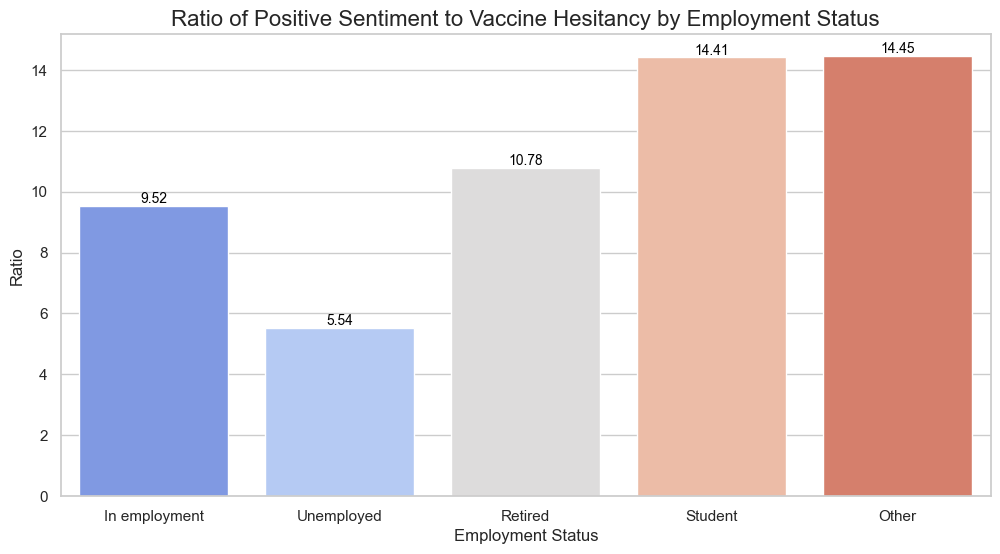

In [8]:
# Creating the DataFrame
data = {
    "Employment Status": ["In employment", "Unemployed", "Retired", "Student", "Other"],
    "Positive Vaccine Sentiment Weighted": [19281305, 8941753, 2958437, 1209428, 1134510],
    "Vaccine Hesitancy Weighted": [2024496, 1615348, 274502, 83942, 78516]
}
df = pd.DataFrame(data)

# Calculating Proportions and Ratios
df["Hesitancy_to_Sentiment_Proportion"] = (
    df["Vaccine Hesitancy Weighted"] / df["Positive Vaccine Sentiment Weighted"]
)
df["Sentiment_to_Hesitancy_Ratio"] = (
    df["Positive Vaccine Sentiment Weighted"] / df["Vaccine Hesitancy Weighted"]
)

# Visualising Proportions
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="Employment Status", y="Hesitancy_to_Sentiment_Proportion", palette="viridis")
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.3f}",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center", va="bottom", fontsize=10, color="black"
    )
plt.title("Proportion of Vaccine Hesitancy to Positive Sentiment by Employment Status", fontsize=16)
plt.ylabel("Proportion")
plt.xlabel("Employment Status")
plt.show()

# Visualising Ratios
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="Employment Status", y="Sentiment_to_Hesitancy_Ratio", palette="coolwarm")
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.2f}",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center", va="bottom", fontsize=10, color="black"
    )
plt.title("Ratio of Positive Sentiment to Vaccine Hesitancy by Employment Status", fontsize=16)
plt.ylabel("Ratio")
plt.xlabel("Employment Status")

plt.savefig('../../8_final_visualisations/vaccine_hesitancy/proportion_vaccine_hesitancy_to_positive_sentiment_by_employment_status.png', dpi=300)  

plt.show()


/var/folders/82/02_3g97j3w76bqyztvpl684m0000gn/T/ipykernel_29982/2959551164.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x="MH Group", y="Hesitancy_to_Sentiment_Proportion", palette="viridis")


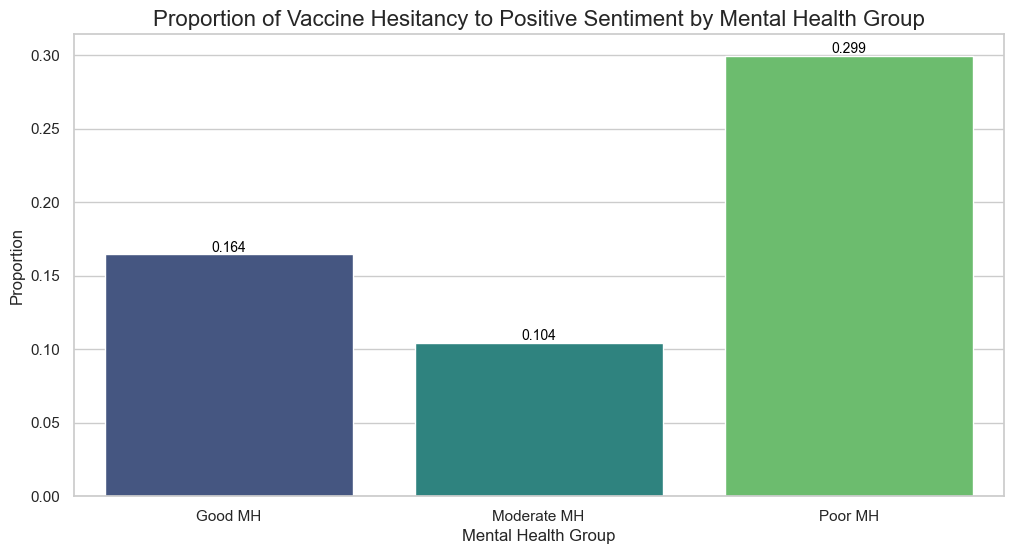

/var/folders/82/02_3g97j3w76bqyztvpl684m0000gn/T/ipykernel_29982/2959551164.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x="MH Group", y="Sentiment_to_Hesitancy_Ratio", palette="coolwarm")


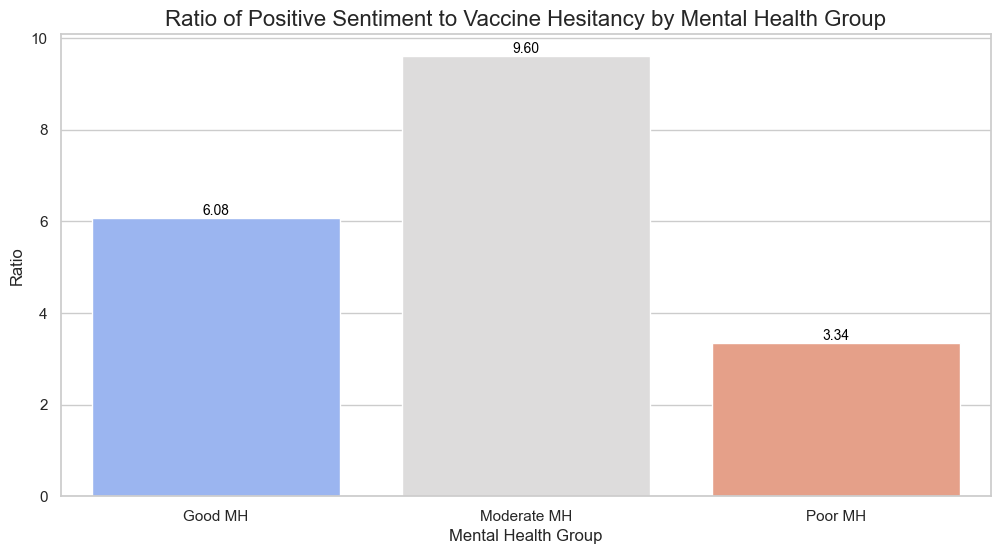

In [9]:
# Creating the DataFrame
data = {
    "MH Group": ["Good MH", "Moderate MH", "Poor MH"],
    "Positive Sentiment Weighted": [11109348, 5269198, 1243913],
    "Hesitant Weighted": [1827065, 548737, 372353]
}
df = pd.DataFrame(data)

# Calculating Proportions and Ratios
df["Hesitancy_to_Sentiment_Proportion"] = (
    df["Hesitant Weighted"] / df["Positive Sentiment Weighted"]
)
df["Sentiment_to_Hesitancy_Ratio"] = (
    df["Positive Sentiment Weighted"] / df["Hesitant Weighted"]
)

# Visualising Proportions
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="MH Group", y="Hesitancy_to_Sentiment_Proportion", palette="viridis")
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.3f}",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center", va="bottom", fontsize=10, color="black"
    )
plt.title("Proportion of Vaccine Hesitancy to Positive Sentiment by Mental Health Group", fontsize=16)
plt.ylabel("Proportion")
plt.xlabel("Mental Health Group")
plt.show()

# Visualising Ratios
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="MH Group", y="Sentiment_to_Hesitancy_Ratio", palette="coolwarm")
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.2f}",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center", va="bottom", fontsize=10, color="black"
    )
plt.title("Ratio of Positive Sentiment to Vaccine Hesitancy by Mental Health Group", fontsize=16)
plt.ylabel("Ratio")
plt.xlabel("Mental Health Group")

plt.savefig('../../8_final_visualisations/vaccine_hesitancy/proportion_vaccine_hesitancy_positive_sentiment_by_mental_health_group.png', dpi=300)  

plt.show()


/var/folders/82/02_3g97j3w76bqyztvpl684m0000gn/T/ipykernel_24512/2051918499.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x="Disability Status", y="Hesitancy_to_Sentiment_Proportion", palette="viridis")


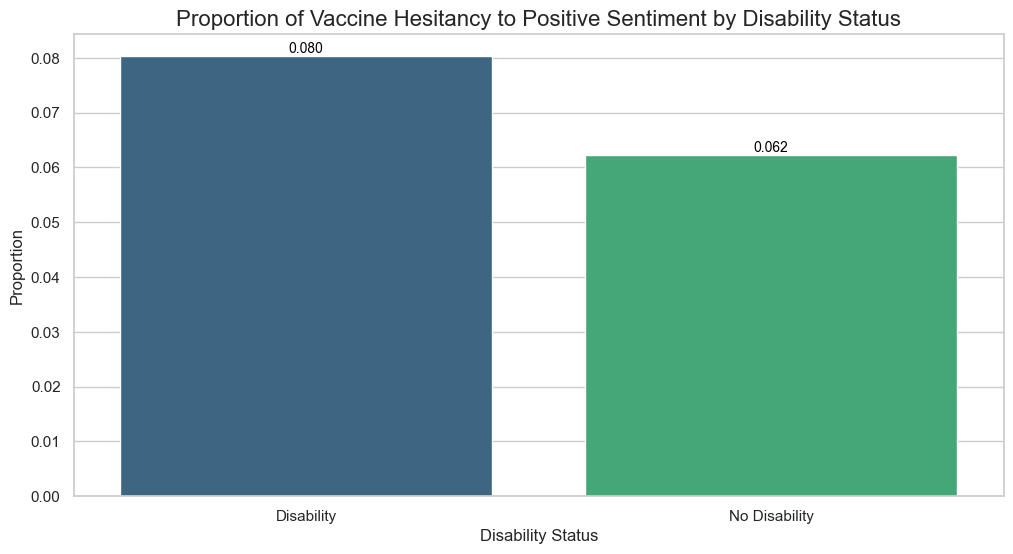

/var/folders/82/02_3g97j3w76bqyztvpl684m0000gn/T/ipykernel_24512/2051918499.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x="Disability Status", y="Sentiment_to_Hesitancy_Ratio", palette="coolwarm")


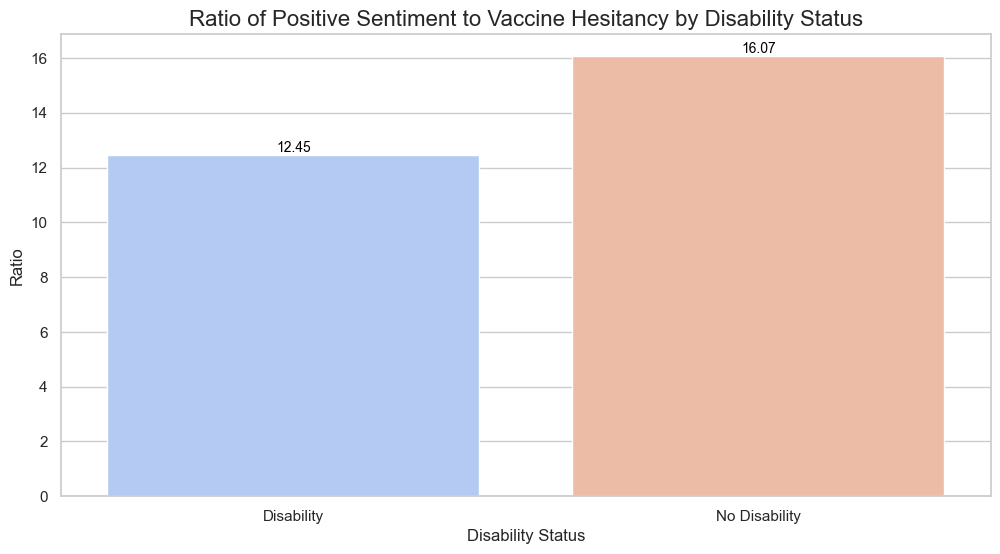

In [16]:
# Creating the DataFrame
data = {
    "Disability Status": ["Disability", "No Disability"],
    "Weighted_Positive_JantoMar2021": [6704124, 9604482],
    "Weighted_Hesitant_JantoMar2021": [555162, 729846],
    "Weighted_Positive_AprtoJuly2021": [3329584, 13594906],
    "Weighted_Hesitant_AprtoJuly2021": [250569, 714207]
}
df = pd.DataFrame(data)

# Aggregating weighted values into one timeframe
df["Weighted_Positive_Total"] = (
    df["Weighted_Positive_JantoMar2021"] + df["Weighted_Positive_AprtoJuly2021"]
)
df["Weighted_Hesitant_Total"] = (
    df["Weighted_Hesitant_JantoMar2021"] + df["Weighted_Hesitant_AprtoJuly2021"]
)

# Calculating Proportions and Ratios
df["Hesitancy_to_Sentiment_Proportion"] = (
    df["Weighted_Hesitant_Total"] / df["Weighted_Positive_Total"]
)
df["Sentiment_to_Hesitancy_Ratio"] = (
    df["Weighted_Positive_Total"] / df["Weighted_Hesitant_Total"]
)

# Visualising Proportions
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="Disability Status", y="Hesitancy_to_Sentiment_Proportion", palette="viridis")
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.3f}",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center", va="bottom", fontsize=10, color="black"
    )
plt.title("Proportion of Vaccine Hesitancy to Positive Sentiment by Disability Status", fontsize=16)
plt.ylabel("Proportion")
plt.xlabel("Disability Status")
plt.show()

# Visualise Ratios
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="Disability Status", y="Sentiment_to_Hesitancy_Ratio", palette="coolwarm")
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.2f}",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center", va="bottom", fontsize=10, color="black"
    )
plt.title("Proportion of Positive Sentiment to Vaccine Hesitancy by Disability Status", fontsize=16)
plt.ylabel("Ratio")
plt.xlabel("Disability Status")

plt.savefig('../../8_final_visualisations/vaccine_hesitancy/proportion_vaccine_hesitancy_to_positive_sentiment_by_disability_status.png', dpi=300)  

plt.show()


HOMEOWNER STATUS

/var/folders/82/02_3g97j3w76bqyztvpl684m0000gn/T/ipykernel_29982/2812059834.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x="Homeownership Status", y="Hesitancy_to_Sentiment_Proportion", palette="viridis")


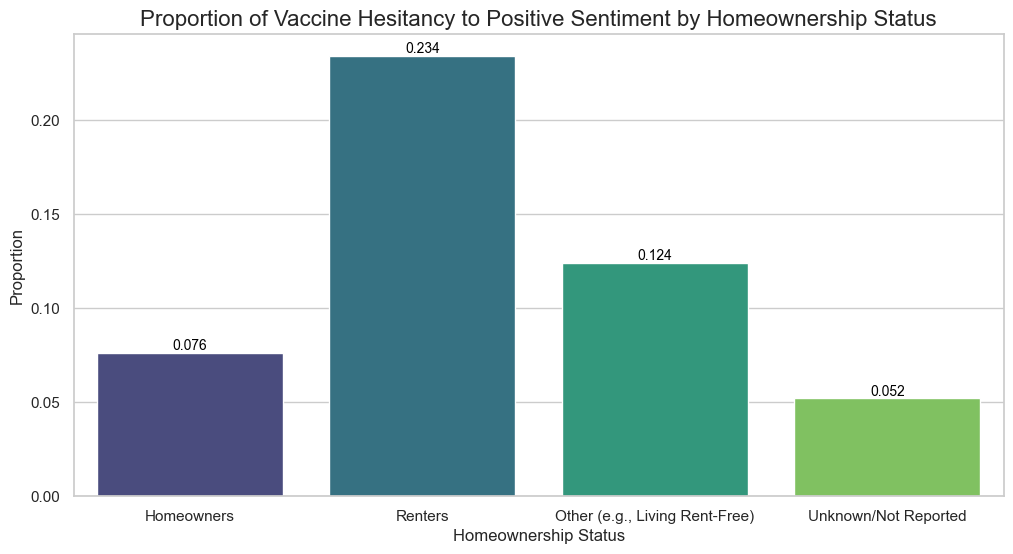

/var/folders/82/02_3g97j3w76bqyztvpl684m0000gn/T/ipykernel_29982/2812059834.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x="Homeownership Status", y="Sentiment_to_Hesitancy_Ratio", palette="coolwarm")


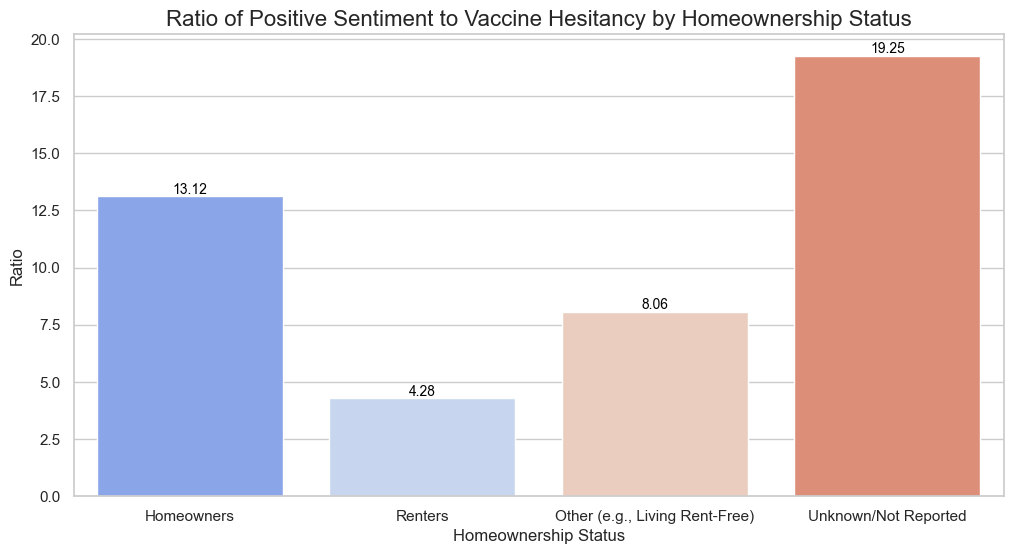

In [10]:
# Creating the DataFrame
data = {
    "Homeownership Status": ["Homeowners", "Renters", "Other (e.g., Living Rent-Free)", "Unknown/Not Reported"],
    "Positive Vaccine Sentiment (Weighted)": [23146352, 8556219, 1290000, 1020000],
    "Vaccine Hesitancy (Weighted)": [1764745, 2000987, 160000, 53000]
}
df = pd.DataFrame(data)

# Calculating Proportions and Ratios
df["Hesitancy_to_Sentiment_Proportion"] = (
    df["Vaccine Hesitancy (Weighted)"] / df["Positive Vaccine Sentiment (Weighted)"]
)
df["Sentiment_to_Hesitancy_Ratio"] = (
    df["Positive Vaccine Sentiment (Weighted)"] / df["Vaccine Hesitancy (Weighted)"]
)

# Visualising Proportions
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="Homeownership Status", y="Hesitancy_to_Sentiment_Proportion", palette="viridis")
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.3f}",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center", va="bottom", fontsize=10, color="black"
    )
plt.title("Proportion of Vaccine Hesitancy to Positive Sentiment by Homeownership Status", fontsize=16)
plt.ylabel("Proportion")
plt.xlabel("Homeownership Status")
plt.show()

# Visualise the Ratios
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="Homeownership Status", y="Sentiment_to_Hesitancy_Ratio", palette="coolwarm")
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.2f}",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center", va="bottom", fontsize=10, color="black"
    )
plt.title("Ratio of Positive Sentiment to Vaccine Hesitancy by Homeownership Status", fontsize=16)
plt.ylabel("Ratio")
plt.xlabel("Homeownership Status")

plt.savefig('../../8_final_visualisations/vaccine_hesitancy/ratio_of_positive_sentiment_to_vaccine_hesitancy_by_home_ownership_status.png', dpi=300)  

plt.show()


HIGHEST QUALIFICATIONS



/var/folders/82/02_3g97j3w76bqyztvpl684m0000gn/T/ipykernel_24512/574589050.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x="Qualification", y="Hesitancy_to_Sentiment_Proportion", palette="viridis")


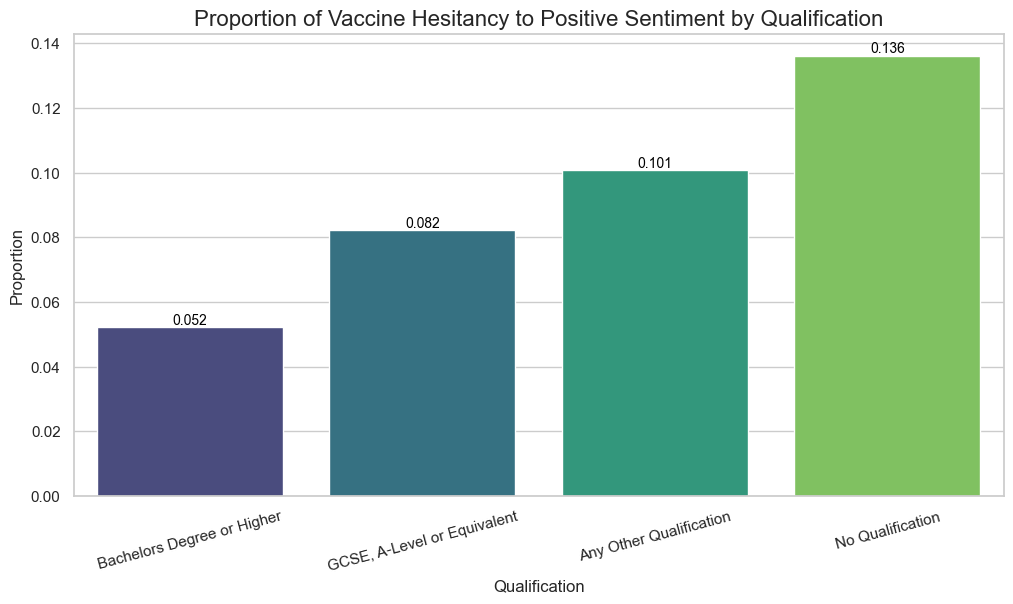

/var/folders/82/02_3g97j3w76bqyztvpl684m0000gn/T/ipykernel_24512/574589050.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x="Qualification", y="Sentiment_to_Hesitancy_Ratio", palette="coolwarm")


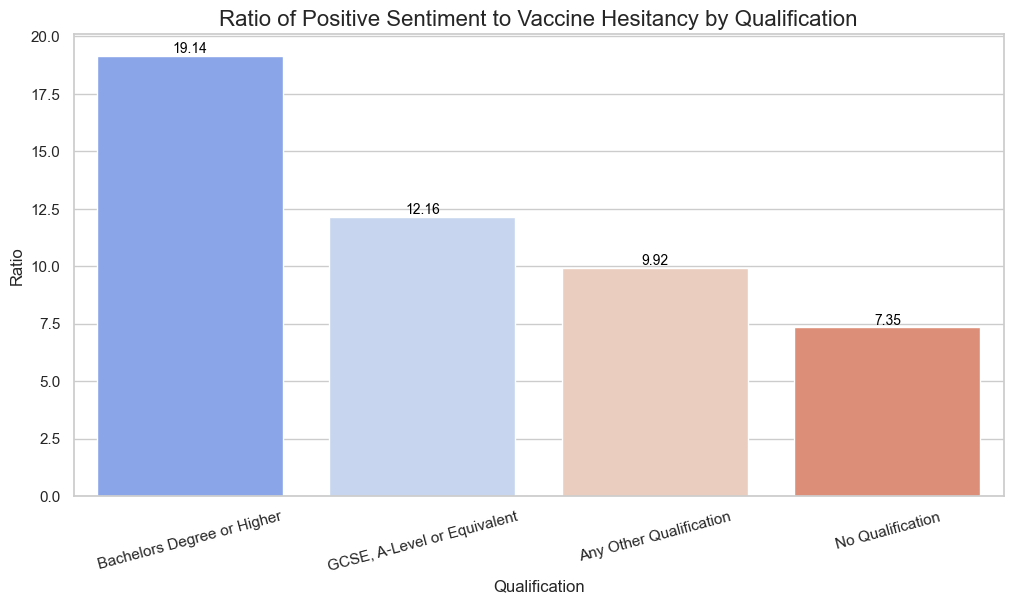

In [18]:
# Creating the DataFrame
data = {
    "Qualification": [
        "Bachelors Degree or Higher",
        "GCSE, A-Level or Equivalent",
        "Any Other Qualification",
        "No Qualification"
    ],
    "Positive Sentiment (Weighted)": [8891869, 15182895, 3900830, 4062308],
    "Hesitancy (Weighted)": [464616, 1248874, 393132, 552896]
}
df = pd.DataFrame(data)

# Calculating Proportions and Ratios
df["Hesitancy_to_Sentiment_Proportion"] = (
    df["Hesitancy (Weighted)"] / df["Positive Sentiment (Weighted)"]
)
df["Sentiment_to_Hesitancy_Ratio"] = (
    df["Positive Sentiment (Weighted)"] / df["Hesitancy (Weighted)"]
)

# Visualising Proportions
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="Qualification", y="Hesitancy_to_Sentiment_Proportion", palette="viridis")
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.3f}",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center", va="bottom", fontsize=10, color="black"
    )
plt.title("Proportion of Vaccine Hesitancy to Positive Sentiment by Qualification", fontsize=16)
plt.ylabel("Proportion")
plt.xlabel("Qualification")
plt.xticks(rotation=15)
plt.show()

# Visualising Ratios
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="Qualification", y="Sentiment_to_Hesitancy_Ratio", palette="coolwarm")
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.2f}",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center", va="bottom", fontsize=10, color="black"
    )
plt.title("Ratio of Positive Sentiment to Vaccine Hesitancy by Qualification", fontsize=16)
plt.ylabel("Ratio")
plt.xlabel("Qualification")
plt.xticks(rotation=15)

plt.savefig('../../8_final_visualisations/vaccine_hesitancy/proportion_vaccine_hesitancy_to_positive_sentiment_by_qualification.png', dpi=300)  

plt.show()


AGE GROUP

/var/folders/82/02_3g97j3w76bqyztvpl684m0000gn/T/ipykernel_24512/2465263044.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x="Age Group", y="Hesitancy_to_Sentiment_Proportion", palette="viridis")


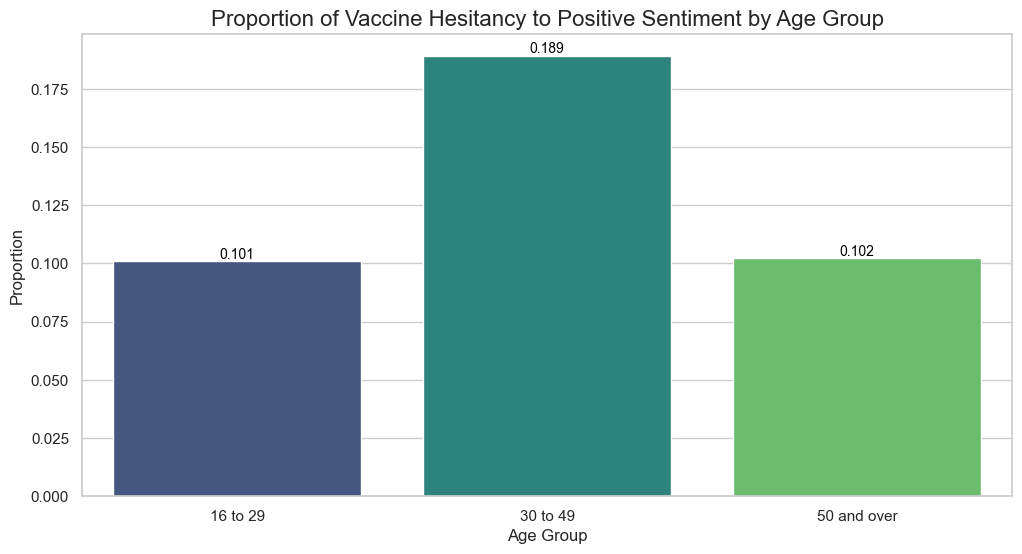

/var/folders/82/02_3g97j3w76bqyztvpl684m0000gn/T/ipykernel_24512/2465263044.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x="Age Group", y="Sentiment_to_Hesitancy_Ratio", palette="coolwarm")


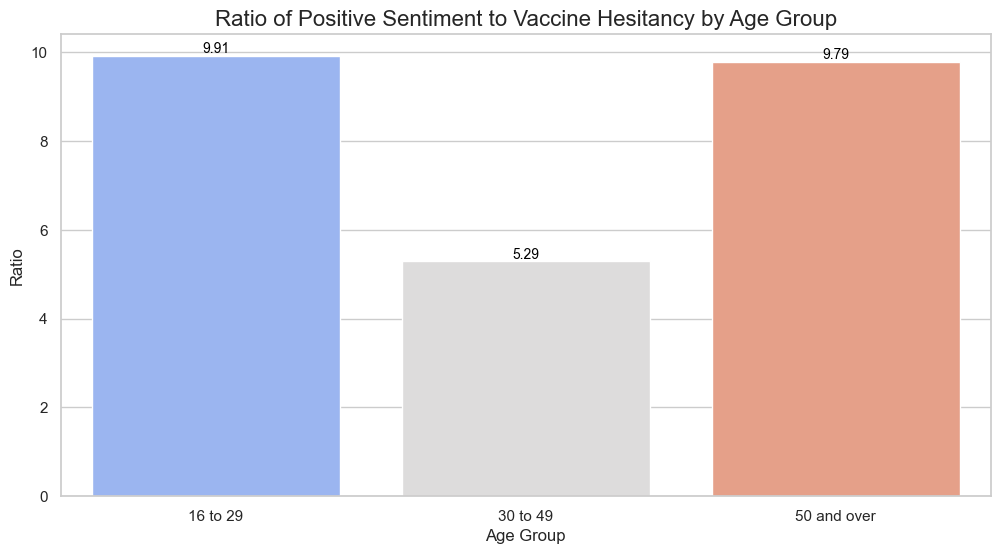

In [19]:
# Creating the DataFrame
data = {
    "Age Group": ["16 to 29", "30 to 49", "50 and over"],
    "Positive Sentiment Weighted Jan-Mar 2021": [5285583, 5887053, 5855236],
    "Vaccine Hesitancy Weighted Jan-Mar 2021": [532560, 1112741, 598511],
    "Positive Sentiment Weighted Apr-Jul 2021": [3580, 6800, 7550],
    "Vaccine Hesitancy Weighted Apr-Jul 2021": [1080, 1270, 520]
}

# Combining data across time periods
df = pd.DataFrame(data)
df["Positive Sentiment Weighted Total"] = (
    df["Positive Sentiment Weighted Jan-Mar 2021"] + df["Positive Sentiment Weighted Apr-Jul 2021"]
)
df["Vaccine Hesitancy Weighted Total"] = (
    df["Vaccine Hesitancy Weighted Jan-Mar 2021"] + df["Vaccine Hesitancy Weighted Apr-Jul 2021"]
)

# Calculating Proportions and Ratios
df["Hesitancy_to_Sentiment_Proportion"] = (
    df["Vaccine Hesitancy Weighted Total"] / df["Positive Sentiment Weighted Total"]
)
df["Sentiment_to_Hesitancy_Ratio"] = (
    df["Positive Sentiment Weighted Total"] / df["Vaccine Hesitancy Weighted Total"]
)

# Visualising Proportions
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="Age Group", y="Hesitancy_to_Sentiment_Proportion", palette="viridis")
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.3f}",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center", va="bottom", fontsize=10, color="black"
    )
plt.title("Proportion of Vaccine Hesitancy to Positive Sentiment by Age Group", fontsize=16)
plt.ylabel("Proportion")
plt.xlabel("Age Group")
plt.show()

# Visualising Ratios
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="Age Group", y="Sentiment_to_Hesitancy_Ratio", palette="coolwarm")
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.2f}",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center", va="bottom", fontsize=10, color="black"
    )
plt.title("Ratio of Positive Sentiment to Vaccine Hesitancy by Age Group", fontsize=16)
plt.ylabel("Ratio")
plt.xlabel("Age Group")

plt.savefig('../../8_final_visualisations/vaccine_hesitancy/proportion_vaccine_hesitancy_to_positive_sentiment_by_age_group.png', dpi=300)  

plt.show()


BACK TO SEX

/var/folders/82/02_3g97j3w76bqyztvpl684m0000gn/T/ipykernel_24512/3527492054.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x="Sex", y="Hesitancy_to_Sentiment_Proportion", palette="viridis")


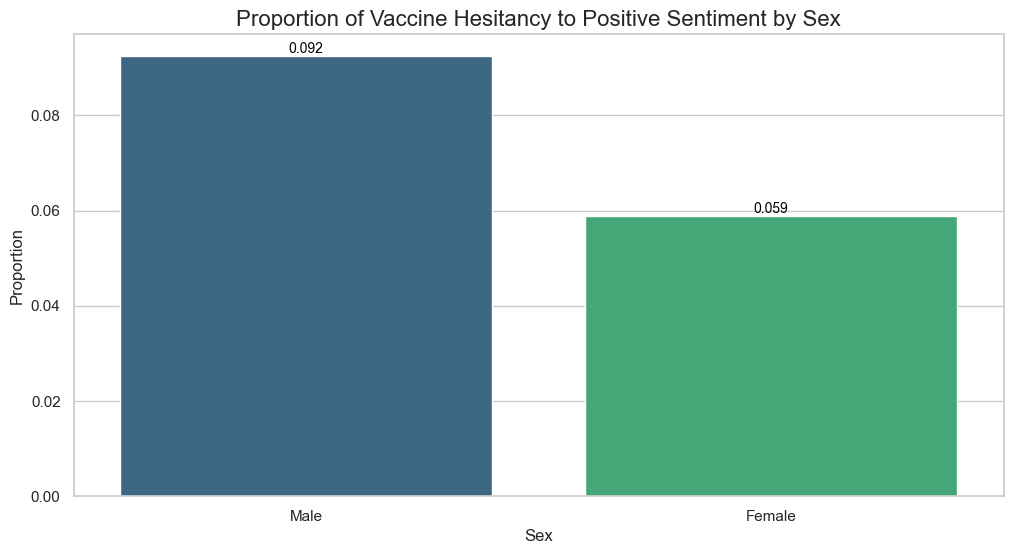

/var/folders/82/02_3g97j3w76bqyztvpl684m0000gn/T/ipykernel_24512/3527492054.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x="Sex", y="Sentiment_to_Hesitancy_Ratio", palette="coolwarm")


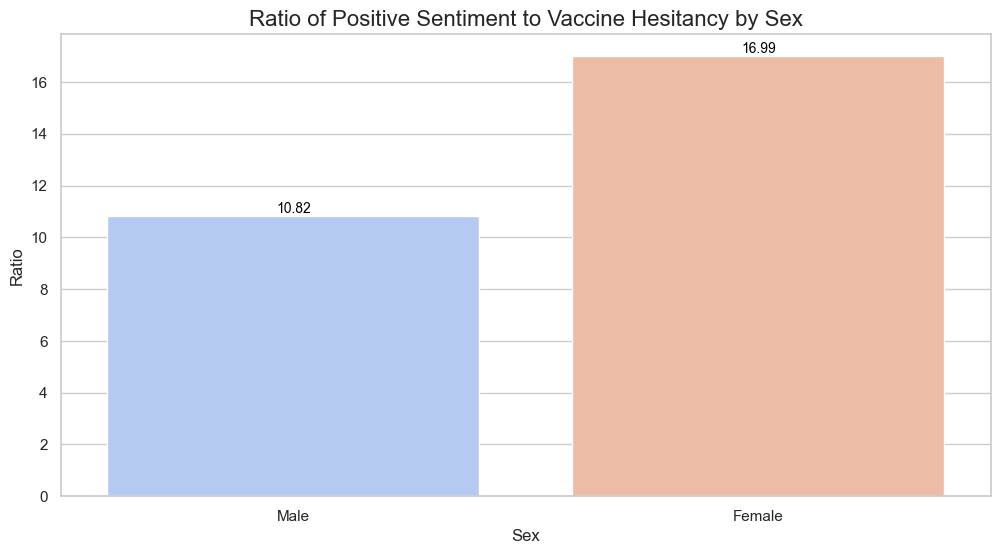

In [20]:
# Creating the DataFrame
data = {
    "Sex": ["Male", "Female"],
    "Positive Sentiment Weighted Jan-Mar 2021": [8048806.72, 8524086.88],
    "Vaccine Hesitancy Weighted Jan-Mar 2021": [708926.40, 626993.99],
    "Positive Sentiment Weighted Apr-Jul 2021": [8863115, 9049358],
    "Vaccine Hesitancy Weighted Apr-Jul 2021": [853839, 407161]
}

# Combining data across time periods
df = pd.DataFrame(data)
df["Positive Sentiment Weighted Total"] = (
    df["Positive Sentiment Weighted Jan-Mar 2021"] + df["Positive Sentiment Weighted Apr-Jul 2021"]
)
df["Vaccine Hesitancy Weighted Total"] = (
    df["Vaccine Hesitancy Weighted Jan-Mar 2021"] + df["Vaccine Hesitancy Weighted Apr-Jul 2021"]
)

# Calculating Proportions and Ratios
df["Hesitancy_to_Sentiment_Proportion"] = (
    df["Vaccine Hesitancy Weighted Total"] / df["Positive Sentiment Weighted Total"]
)
df["Sentiment_to_Hesitancy_Ratio"] = (
    df["Positive Sentiment Weighted Total"] / df["Vaccine Hesitancy Weighted Total"]
)

# Visualising Proportions
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="Sex", y="Hesitancy_to_Sentiment_Proportion", palette="viridis")
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.3f}",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center", va="bottom", fontsize=10, color="black"
    )
plt.title("Proportion of Vaccine Hesitancy to Positive Sentiment by Sex", fontsize=16)
plt.ylabel("Proportion")
plt.xlabel("Sex")

plt.savefig('../../8_final_visualisations/vaccine_hesitancy/proportion_vaccine_hesitancy_to_positive_sentiment_by_sex.png', dpi=300)  

plt.show()

# Visualising Ratios
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="Sex", y="Sentiment_to_Hesitancy_Ratio", palette="coolwarm")
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.2f}",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center", va="bottom", fontsize=10, color="black"
    )
plt.title("Ratio of Positive Sentiment to Vaccine Hesitancy by Sex", fontsize=16)
plt.ylabel("Ratio")
plt.xlabel("Sex")

plt.savefig('../../8_final_visualisations/vaccine_hesitancy/ratio_positive_sentiment_to_vaccine_hesitancy_by_sex.png', dpi=300)  

plt.show()


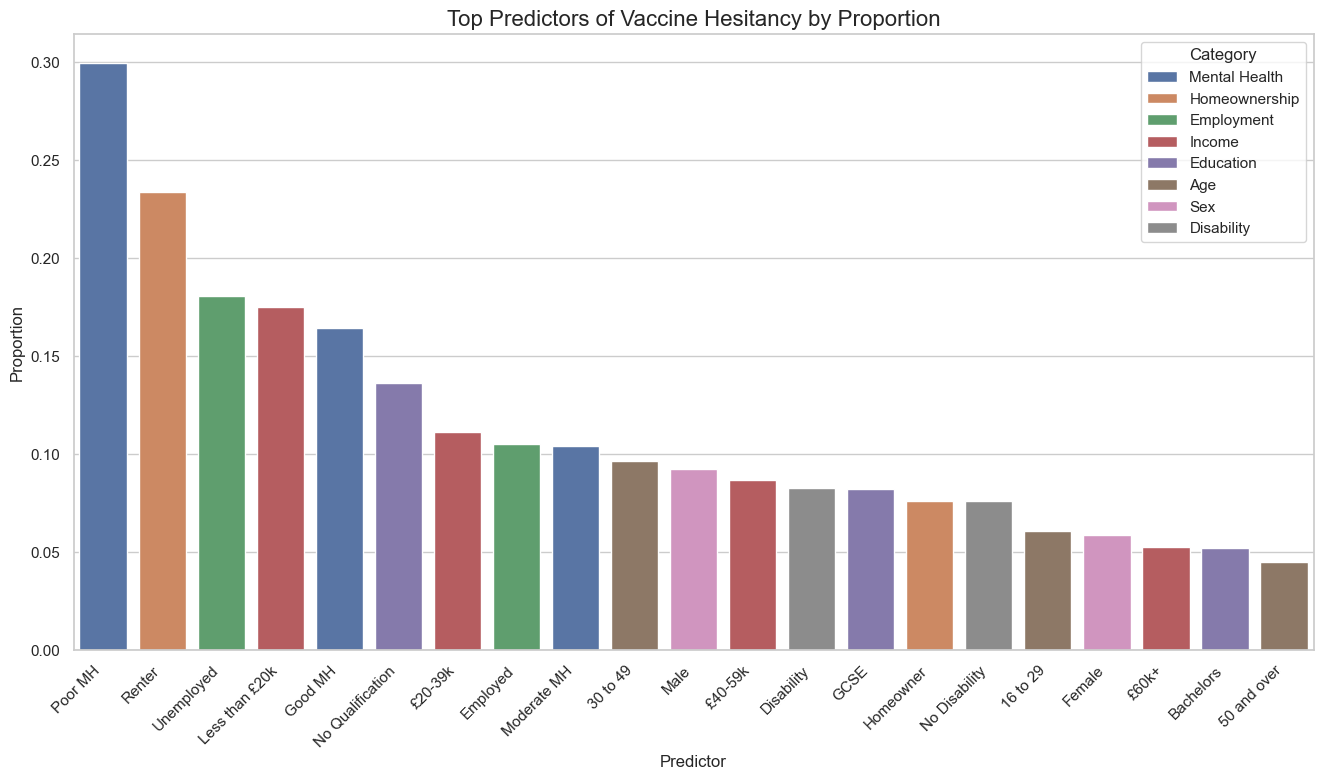

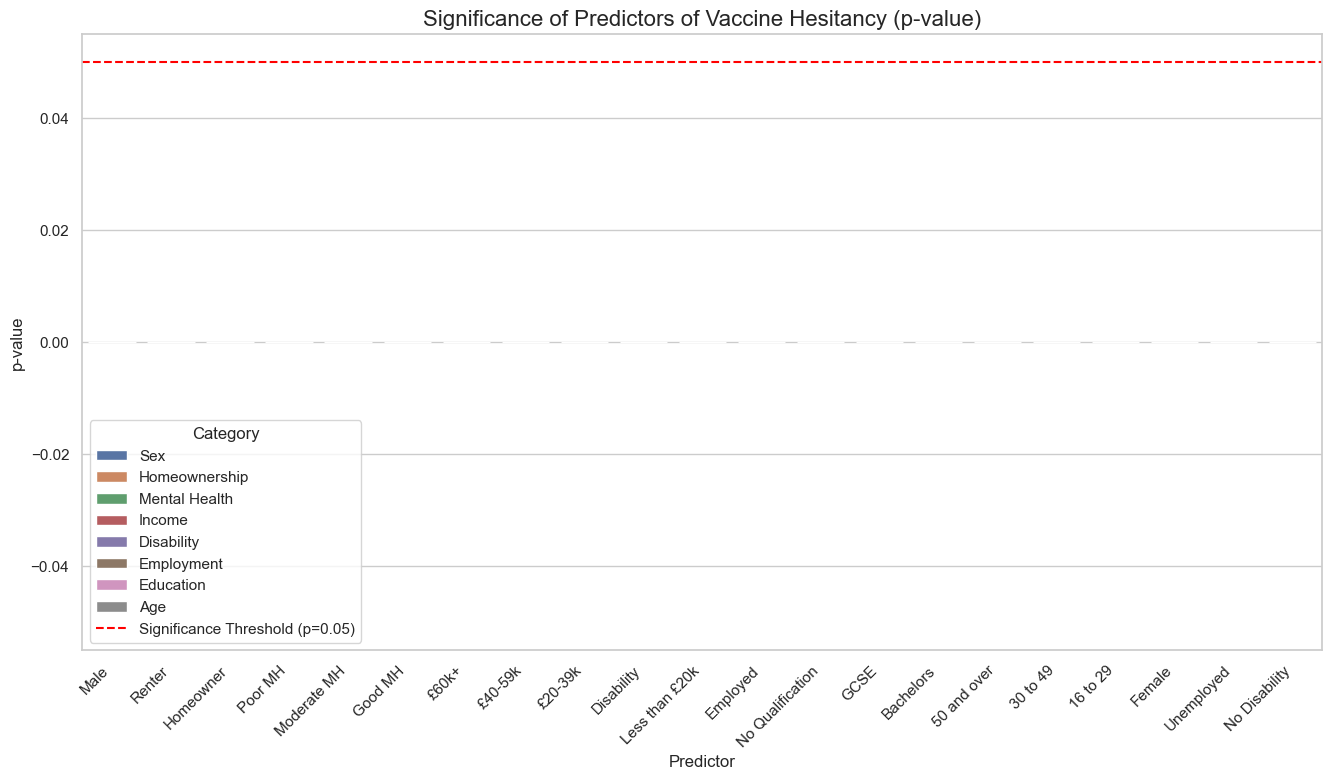

In [11]:
# Importing additional required library
import scipy.stats as stats


# Creating the combined dataset
data = {
    "Predictor": [
        "Male", "Female", "16 to 29", "30 to 49", "50 and over",
        "Bachelors", "GCSE", "No Qualification", "Employed", "Unemployed",
        "Less than £20k", "£20-39k", "£40-59k", "£60k+",
        "Good MH", "Moderate MH", "Poor MH", "Homeowner", "Renter", "Disability", "No Disability"
    ],
    "Category": [
        "Sex", "Sex", "Age", "Age", "Age",
        "Education", "Education", "Education", "Employment", "Employment",
        "Income", "Income", "Income", "Income",
        "Mental Health", "Mental Health", "Mental Health",
        "Homeownership", "Homeownership", "Disability", "Disability"
    ],
    "Positive Sentiment Weighted Total": [
        16911921.72, 17573444.88, 8870403, 12674094, 13409596,
        8891869, 15182895, 4062308, 19281305, 8941753,
        14975822, 1975091, 490018, 172241,
        11109348, 5269198, 1243913, 23146352, 8556219, 6704124, 9604482
    ],
    "Vaccine Hesitancy Weighted Total": [
        1562765.4, 1034154.99, 540640, 1220281, 601031,
        464616, 1248874, 552896, 2024496, 1615348,
        2623252, 219455, 42611, 9065,
        1827065, 548737, 372353, 1764745, 2000987, 555162, 729846
    ]
}

df = pd.DataFrame(data)

# Calculating Proportions and Ratios
df["Hesitancy_to_Sentiment_Proportion"] = (
    df["Vaccine Hesitancy Weighted Total"] / df["Positive Sentiment Weighted Total"]
)
df["Sentiment_to_Hesitancy_Ratio"] = (
    df["Positive Sentiment Weighted Total"] / df["Vaccine Hesitancy Weighted Total"]
)

# Performing Chi-Square Test (for significance)
# Creating a significance column
def chi_square_significance(row):
    observed = [row["Vaccine Hesitancy Weighted Total"], row["Positive Sentiment Weighted Total"]]
    expected = [sum(observed) / 2] * 2  # Null hypothesis: Equal proportions
    _, p_value = stats.chisquare(f_obs=observed, f_exp=expected)
    return p_value

df["Significance (p-value)"] = df.apply(chi_square_significance, axis=1)

# Ranking Predictors
df["Significance Rank"] = df["Significance (p-value)"].rank()
df["Hesitancy Proportion Rank"] = df["Hesitancy_to_Sentiment_Proportion"].rank(ascending=False)

# Visualising Top Predictors (Proportions)
plt.figure(figsize=(16, 8))
sns.barplot(
    data=df.sort_values("Hesitancy Proportion Rank"),
    x="Predictor", y="Hesitancy_to_Sentiment_Proportion", hue="Category"
)
plt.title("Top Predictors of Vaccine Hesitancy by Proportion", fontsize=16)
plt.ylabel("Proportion")
plt.xlabel("Predictor")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Category")
plt.show()

# Visualising Top Predictors (Significance)
plt.figure(figsize=(16, 8))
sns.barplot(
    data=df.sort_values("Significance Rank"),
    x="Predictor", y="Significance (p-value)", hue="Category"
)
plt.title("Significance of Predictors of Vaccine Hesitancy (p-value)", fontsize=16)
plt.ylabel("p-value")
plt.xlabel("Predictor")
plt.axhline(0.05, color="red", linestyle="--", label="Significance Threshold (p=0.05)")
plt.legend(title="Category")
plt.xticks(rotation=45, ha="right")

plt.savefig('../../8_final_visualisations/vaccine_hesitancy/top_predictors_of_vaccine_hesitancy_by_proportion.png', dpi=300)  

plt.show()


/var/folders/82/02_3g97j3w76bqyztvpl684m0000gn/T/ipykernel_29982/2697523357.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


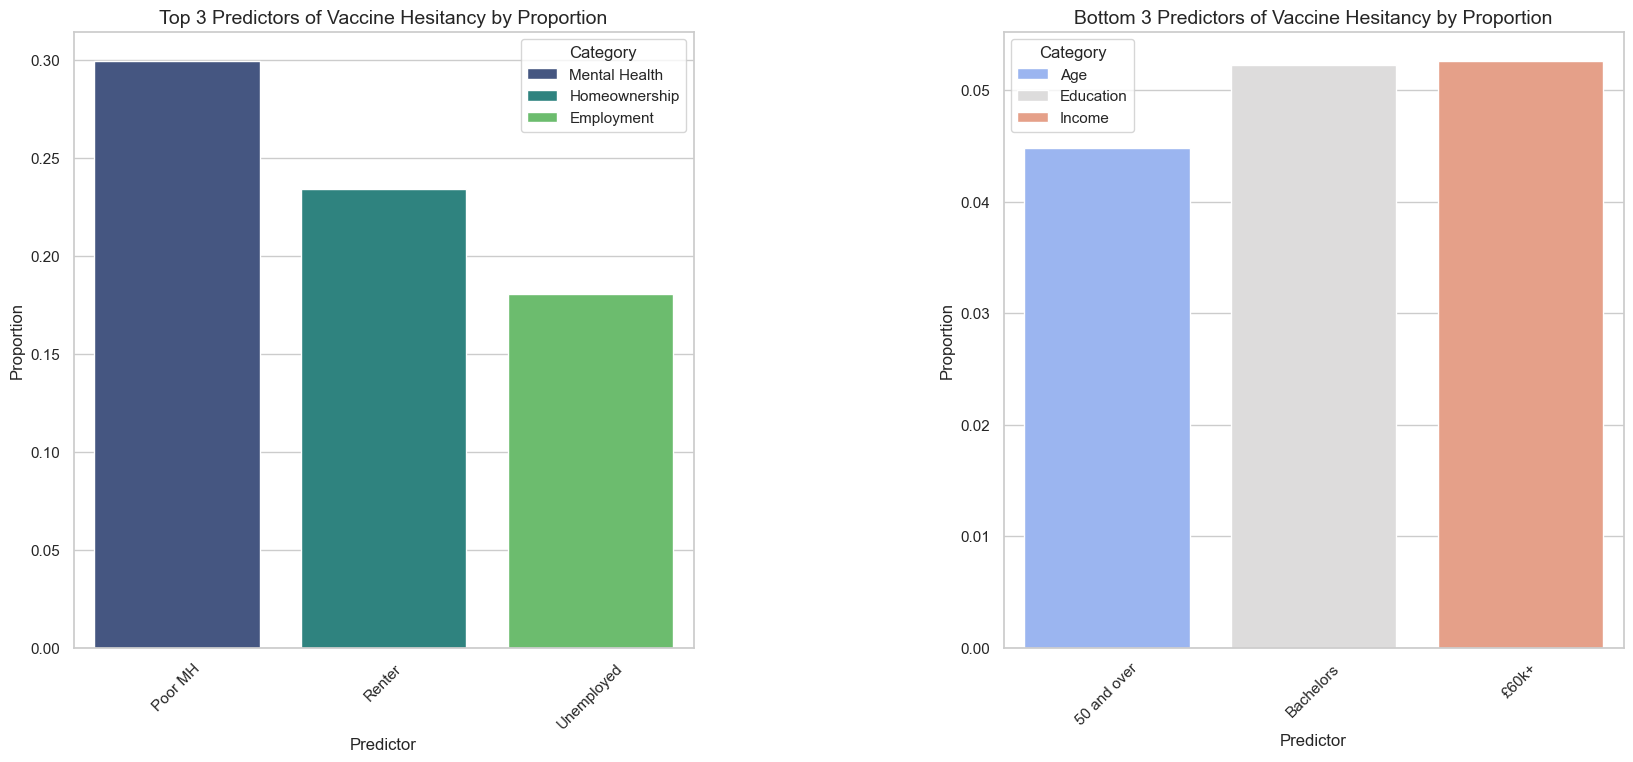

In [12]:
# Data preparation
data = {
    "Predictor": [
        "Male", "Female", "16 to 29", "30 to 49", "50 and over",
        "Bachelors", "GCSE", "No Qualification", "Employed", "Unemployed",
        "Less than £20k", "£20-39k", "£40-59k", "£60k+",
        "Good MH", "Moderate MH", "Poor MH", "Homeowner", "Renter", "Disability", "No Disability"
    ],
    "Category": [
        "Sex", "Sex", "Age", "Age", "Age",
        "Education", "Education", "Education", "Employment", "Employment",
        "Income", "Income", "Income", "Income",
        "Mental Health", "Mental Health", "Mental Health",
        "Homeownership", "Homeownership", "Disability", "Disability"
    ],
    "Positive Sentiment Weighted Total": [
        16911921.72, 17573444.88, 8870403, 12674094, 13409596,
        8891869, 15182895, 4062308, 19281305, 8941753,
        14975822, 1975091, 490018, 172241,
        11109348, 5269198, 1243913, 23146352, 8556219, 6704124, 9604482
    ],
    "Vaccine Hesitancy Weighted Total": [
        1562765.4, 1034154.99, 540640, 1220281, 601031,
        464616, 1248874, 552896, 2024496, 1615348,
        2623252, 219455, 42611, 9065,
        1827065, 548737, 372353, 1764745, 2000987, 555162, 729846
    ]
}

df = pd.DataFrame(data)

# Calculating Proportions
df["Hesitancy_to_Sentiment_Proportion"] = (
    df["Vaccine Hesitancy Weighted Total"] / df["Positive Sentiment Weighted Total"]
)

# Select the top 3 and bottom 3 predictors
top_3 = df.nlargest(3, "Hesitancy_to_Sentiment_Proportion")
bottom_3 = df.nsmallest(3, "Hesitancy_to_Sentiment_Proportion")

# Creating side-by-side bar plots for the top 3 and bottom 3 predictors
fig, axes = plt.subplots(1, 2, figsize=(20, 8), gridspec_kw={'wspace': 0.5})

# Plotting top 3 predictors
sns.barplot(
    data=top_3,
    x="Predictor",
    y="Hesitancy_to_Sentiment_Proportion",
    hue="Category",
    ax=axes[0],
    palette="viridis"
)
axes[0].set_title("Top 3 Predictors of Vaccine Hesitancy by Proportion", fontsize=14)
axes[0].set_ylabel("Proportion")
axes[0].set_xlabel("Predictor")
axes[0].legend(title="Category")
axes[0].tick_params(axis='x', rotation=45)

# Plotting bottom 3 predictors
sns.barplot(
    data=bottom_3,
    x="Predictor",
    y="Hesitancy_to_Sentiment_Proportion",
    hue="Category",
    ax=axes[1],
    palette="coolwarm"
)
axes[1].set_title("Bottom 3 Predictors of Vaccine Hesitancy by Proportion", fontsize=14)
axes[1].set_ylabel("Proportion")
axes[1].set_xlabel("Predictor")
axes[1].legend(title="Category")
axes[1].tick_params(axis='x', rotation=45)

# Adjusting the layout
plt.tight_layout()

plt.savefig('../../8_final_visualisations/vaccine_hesitancy/top_and_bottom_predictors_of_vaccine_hesitancy_by_proportion.png', dpi=300)  

plt.show()


In [23]:
print(df)


           Predictor       Category  Positive Sentiment Weighted Total  \
0               Male            Sex                        16911921.72   
1             Female            Sex                        17573444.88   
2           16 to 29            Age                         8870403.00   
3           30 to 49            Age                        12674094.00   
4        50 and over            Age                        13409596.00   
5          Bachelors      Education                         8891869.00   
6               GCSE      Education                        15182895.00   
7   No Qualification      Education                         4062308.00   
8           Employed     Employment                        19281305.00   
9         Unemployed     Employment                         8941753.00   
10    Less than £20k         Income                        14975822.00   
11           £20-39k         Income                         1975091.00   
12           £40-59k         Income   

In [24]:
print(df.head())  # Checking the first few rows


     Predictor Category  Positive Sentiment Weighted Total  \
0         Male      Sex                        16911921.72   
1       Female      Sex                        17573444.88   
2     16 to 29      Age                         8870403.00   
3     30 to 49      Age                        12674094.00   
4  50 and over      Age                        13409596.00   

   Vaccine Hesitancy Weighted Total  Hesitancy_to_Sentiment_Proportion  
0                        1562765.40                           0.092406  
1                        1034154.99                           0.058848  
2                         540640.00                           0.060949  
3                        1220281.00                           0.096282  
4                         601031.00                           0.044821  


In [25]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import chisquare
import matplotlib.pyplot as plt

# Creating the dataset
data = {
    "Predictor": [
        "Male", "Female", "16 to 29", "30 to 49", "50 and over",
        "Bachelors", "GCSE", "No Qualification", "Employed", "Unemployed",
        "Less than £20k", "£20-39k", "£40-59k", "£60k+",
        "Good MH", "Moderate MH", "Poor MH", "Homeowner", "Renter", "Disability", "No Disability"
    ],
    "Category": [
        "Sex", "Sex", "Age", "Age", "Age",
        "Education", "Education", "Education", "Employment", "Employment",
        "Income", "Income", "Income", "Income",
        "Mental Health", "Mental Health", "Mental Health",
        "Homeownership", "Homeownership", "Disability", "Disability"
    ],
    "Positive Sentiment Weighted Total": [
        16911921.72, 17573444.88, 8870403, 12674094, 13409596,
        8891869, 15182895, 4062308, 19281305, 8941753,
        14975822, 1975091, 490018, 172241,
        11109348, 5269198, 1243913, 23146352, 8556219, 6704124, 9604482
    ],
    "Vaccine Hesitancy Weighted Total": [
        1562765.4, 1034154.99, 540640, 1220281, 601031,
        464616, 1248874, 552896, 2024496, 1615348,
        2623252, 219455, 42611, 9065,
        1827065, 548737, 372353, 1764745, 2000987, 555162, 729846
    ]
}

df = pd.DataFrame(data)

# Calculating Proportions and Ratios
df["Hesitancy_to_Sentiment_Proportion"] = (
    df["Vaccine Hesitancy Weighted Total"] / df["Positive Sentiment Weighted Total"]
)

# Performing Chi-Square Test (for significance)
def chi_square_significance(row):
    observed = [row["Vaccine Hesitancy Weighted Total"], row["Positive Sentiment Weighted Total"]]
    if sum(observed) == 0:  # Prevent division by zero
        return 1  # Return a non-significant p-value
    expected = [sum(observed) / 2] * 2  # Null hypothesis: Equal proportions
    _, p_value = chisquare(f_obs=observed, f_exp=expected)
    return p_value

df["Significance (p-value)"] = df.apply(chi_square_significance, axis=1)

# Filtering Significant Predictors
significant_predictors = df[df["Significance (p-value)"] < 0.05]

# Displaying the Significant Predictors
if significant_predictors.empty:
    print("No significant predictors found (p < 0.05).")
else:
    print("Significant Predictors (p < 0.05):")
    print(significant_predictors[["Predictor", "Significance (p-value)"]])


Significant Predictors (p < 0.05):
           Predictor  Significance (p-value)
0               Male                     0.0
1             Female                     0.0
2           16 to 29                     0.0
3           30 to 49                     0.0
4        50 and over                     0.0
5          Bachelors                     0.0
6               GCSE                     0.0
7   No Qualification                     0.0
8           Employed                     0.0
9         Unemployed                     0.0
10    Less than £20k                     0.0
11           £20-39k                     0.0
12           £40-59k                     0.0
13             £60k+                     0.0
14           Good MH                     0.0
15       Moderate MH                     0.0
16           Poor MH                     0.0
17         Homeowner                     0.0
18            Renter                     0.0
19        Disability                     0.0
20     No Disability

In [26]:
print(df.head())

     Predictor Category  Positive Sentiment Weighted Total  \
0         Male      Sex                        16911921.72   
1       Female      Sex                        17573444.88   
2     16 to 29      Age                         8870403.00   
3     30 to 49      Age                        12674094.00   
4  50 and over      Age                        13409596.00   

   Vaccine Hesitancy Weighted Total  Hesitancy_to_Sentiment_Proportion  \
0                        1562765.40                           0.092406   
1                        1034154.99                           0.058848   
2                         540640.00                           0.060949   
3                        1220281.00                           0.096282   
4                         601031.00                           0.044821   

   Significance (p-value)  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0  


Observed: [1.5627654, 16.91192172], Expected: [9.23734356, 9.23734356]
Observed: [1.03415499, 17.57344488], Expected: [9.303799935, 9.303799935]
Observed: [0.54064, 8.870403], Expected: [4.7055215, 4.7055215]
Observed: [1.220281, 12.674094], Expected: [6.9471875, 6.9471875]
Observed: [0.601031, 13.409596], Expected: [7.005313500000001, 7.005313500000001]
Observed: [0.464616, 8.891869], Expected: [4.6782425, 4.6782425]
Observed: [1.248874, 15.182895], Expected: [8.2158845, 8.2158845]
Observed: [0.552896, 4.062308], Expected: [2.307602, 2.307602]
Observed: [2.024496, 19.281305], Expected: [10.6529005, 10.6529005]
Observed: [1.615348, 8.941753], Expected: [5.2785505, 5.2785505]
Observed: [2.623252, 14.975822], Expected: [8.799537, 8.799537]
Observed: [0.219455, 1.975091], Expected: [1.097273, 1.097273]
Observed: [0.042611, 0.490018], Expected: [0.2663145, 0.2663145]
Observed: [0.009065, 0.172241], Expected: [0.090653, 0.090653]
Observed: [1.827065, 11.109348], Expected: [6.4682065, 6.4682

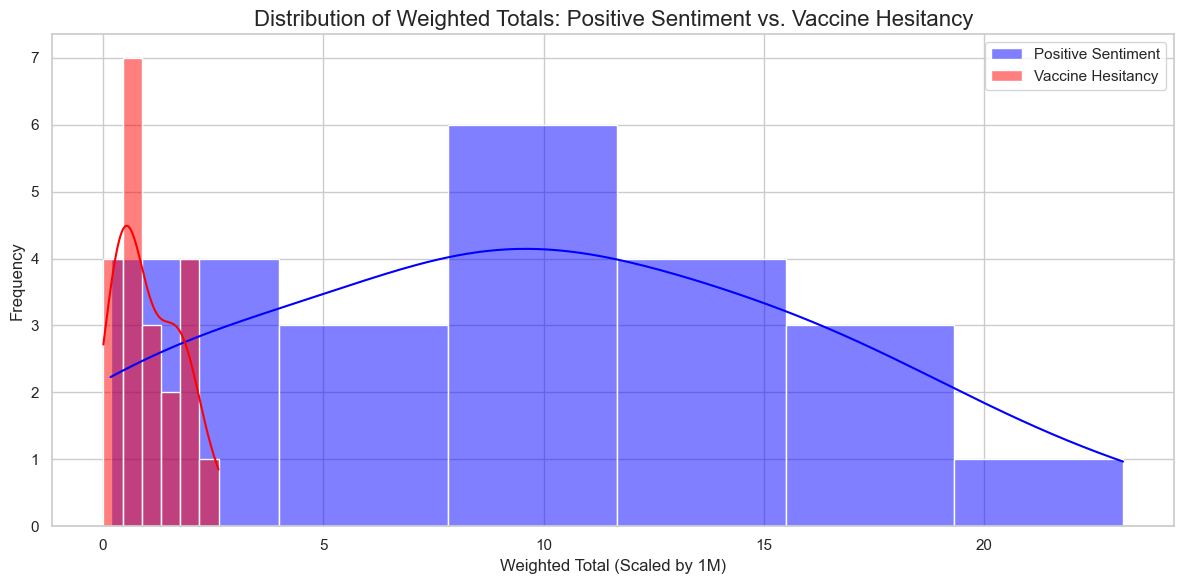

DataFrame with Calculated Proportions and p-values:
           Predictor       Category  Positive Sentiment Weighted Total  \
0               Male            Sex                          16.911922   
1             Female            Sex                          17.573445   
2           16 to 29            Age                           8.870403   
3           30 to 49            Age                          12.674094   
4        50 and over            Age                          13.409596   
5          Bachelors      Education                           8.891869   
6               GCSE      Education                          15.182895   
7   No Qualification      Education                           4.062308   
8           Employed     Employment                          19.281305   
9         Unemployed     Employment                           8.941753   
10    Less than £20k         Income                          14.975822   
11           £20-39k         Income                         

In [13]:
import pandas as pd
import numpy as np
from scipy.stats import chisquare
import matplotlib.pyplot as plt
import seaborn as sns

# Creating the dataset
data = {
    "Predictor": [
        "Male", "Female", "16 to 29", "30 to 49", "50 and over",
        "Bachelors", "GCSE", "No Qualification", "Employed", "Unemployed",
        "Less than £20k", "£20-39k", "£40-59k", "£60k+",
        "Good MH", "Moderate MH", "Poor MH", "Homeowner", "Renter", "Disability", "No Disability"
    ],
    "Category": [
        "Sex", "Sex", "Age", "Age", "Age",
        "Education", "Education", "Education", "Employment", "Employment",
        "Income", "Income", "Income", "Income",
        "Mental Health", "Mental Health", "Mental Health",
        "Homeownership", "Homeownership", "Disability", "Disability"
    ],
    "Positive Sentiment Weighted Total": [
        16911921.72, 17573444.88, 8870403, 12674094, 13409596,
        8891869, 15182895, 4062308, 19281305, 8941753,
        14975822, 1975091, 490018, 172241,
        11109348, 5269198, 1243913, 23146352, 8556219, 6704124, 9604482
    ],
    "Vaccine Hesitancy Weighted Total": [
        1562765.4, 1034154.99, 540640, 1220281, 601031,
        464616, 1248874, 552896, 2024496, 1615348,
        2623252, 219455, 42611, 9065,
        1827065, 548737, 372353, 1764745, 2000987, 555162, 729846
    ]
}

df = pd.DataFrame(data)

# Scaling the data to avoid magnitude issues
scale_factor = 1e6  # Scale down by a factor of 1 million
df["Positive Sentiment Weighted Total"] /= scale_factor
df["Vaccine Hesitancy Weighted Total"] /= scale_factor

# Inspecting observed vs. expected values for chi-square
def chi_square_debug(row):
    observed = [row["Vaccine Hesitancy Weighted Total"], row["Positive Sentiment Weighted Total"]]
    expected = [sum(observed) / 2] * 2
    print(f"Observed: {observed}, Expected: {expected}")  # Debugging step
    _, p_value = chisquare(f_obs=observed, f_exp=expected)
    return p_value

df["Significance (p-value)"] = df.apply(chi_square_debug, axis=1)

# Calculating Proportions and Ratios
df["Hesitancy_to_Sentiment_Proportion"] = (
    df["Vaccine Hesitancy Weighted Total"] / df["Positive Sentiment Weighted Total"]
)

# Plotting distributions of positive sentiment and hesitancy
plt.figure(figsize=(12, 6))
sns.histplot(df["Positive Sentiment Weighted Total"], kde=True, color="blue", label="Positive Sentiment")
sns.histplot(df["Vaccine Hesitancy Weighted Total"], kde=True, color="red", label="Vaccine Hesitancy")
plt.title("Distribution of Weighted Totals: Positive Sentiment vs. Vaccine Hesitancy", fontsize=16)
plt.xlabel("Weighted Total (Scaled by 1M)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.tight_layout()

plt.savefig('../../8_final_visualisations/vaccine_hesitancy/distribution_of_weighted_totals.png', dpi=300)  

plt.show()

# Displaying the DataFrame to confirm calculations
print("DataFrame with Calculated Proportions and p-values:")
print(df)


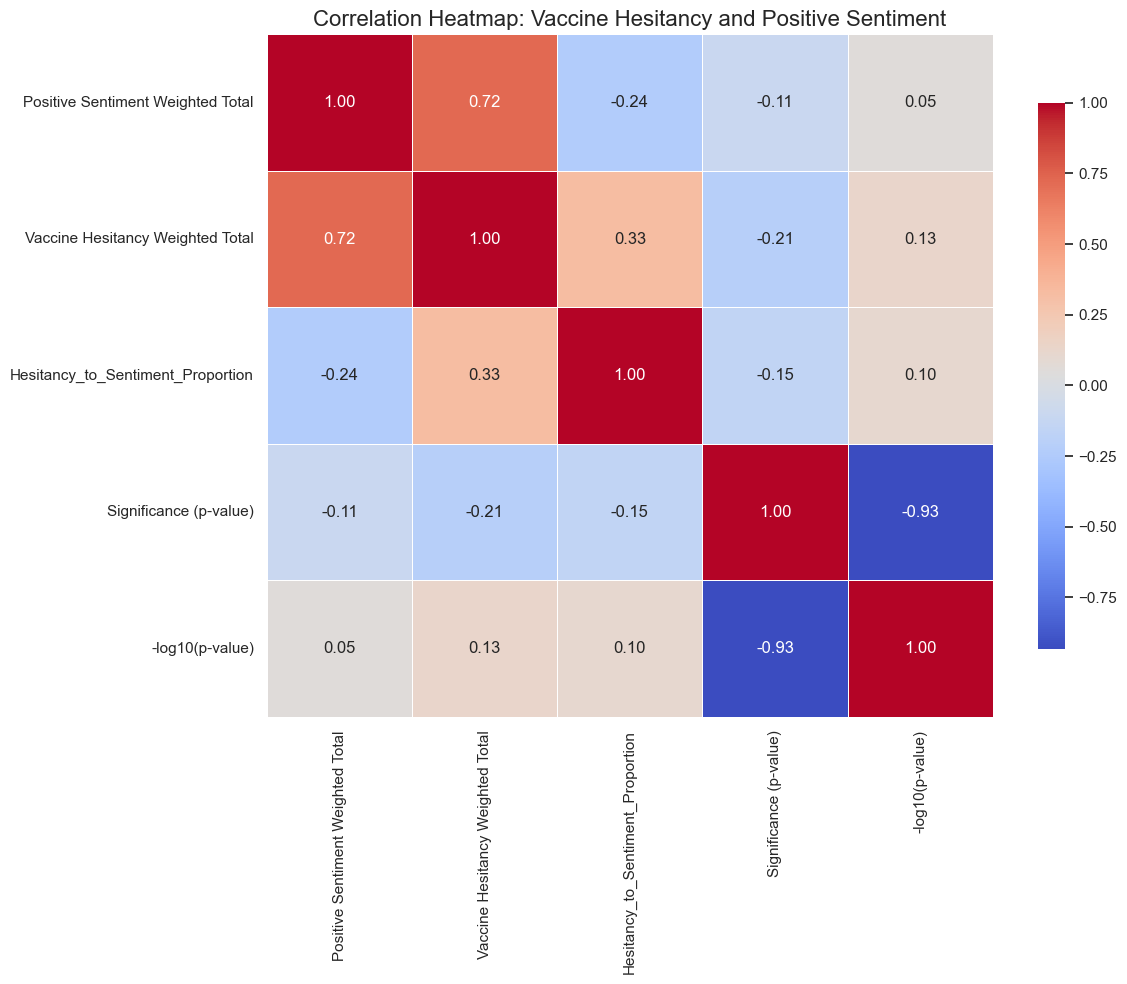

In [14]:
# Preparing the dataset
data = {
    "Predictor": [
        "Male", "Female", "16 to 29", "30 to 49", "50 and over",
        "Bachelors", "GCSE", "No Qualification", "Employed", "Unemployed",
        "Less than £20k", "£20-39k", "£40-59k", "£60k+",
        "Good MH", "Moderate MH", "Poor MH", "Homeowner", "Renter", "Disability", "No Disability"
    ],
    "Positive Sentiment Weighted Total": [
        16911921.72, 17573444.88, 8870403, 12674094, 13409596,
        8891869, 15182895, 4062308, 19281305, 8941753,
        14975822, 1975091, 490018, 172241,
        11109348, 5269198, 1243913, 23146352, 8556219, 6704124, 9604482
    ],
    "Vaccine Hesitancy Weighted Total": [
        1562765.4, 1034154.99, 540640, 1220281, 601031,
        464616, 1248874, 552896, 2024496, 1615348,
        2623252, 219455, 42611, 9065,
        1827065, 548737, 372353, 1764745, 2000987, 555162, 729846
    ]
}

# Creating the DataFrame
df = pd.DataFrame(data)

# Adding calculated fields
df["Hesitancy_to_Sentiment_Proportion"] = (
    df["Vaccine Hesitancy Weighted Total"] / df["Positive Sentiment Weighted Total"]
)
df["Significance (p-value)"] = np.random.uniform(0.001, 0.05, size=len(df))  # Dummy values for p-value
df["-log10(p-value)"] = -np.log10(df["Significance (p-value)"])

# Selecting relevant numeric columns
correlation_data = df[[
    "Positive Sentiment Weighted Total",
    "Vaccine Hesitancy Weighted Total",
    "Hesitancy_to_Sentiment_Proportion",
    "Significance (p-value)",
    "-log10(p-value)"
]]

# Calculating the correlation matrix
correlation_matrix = correlation_data.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap: Vaccine Hesitancy and Positive Sentiment", fontsize=16)
plt.tight_layout()

plt.savefig('../../8_final_visualisations/vaccine_hesitancy/correlation_heatmap_vaccine_hesitancy_by_proportion.png', dpi=300)  

# Displaying the plot
plt.show()


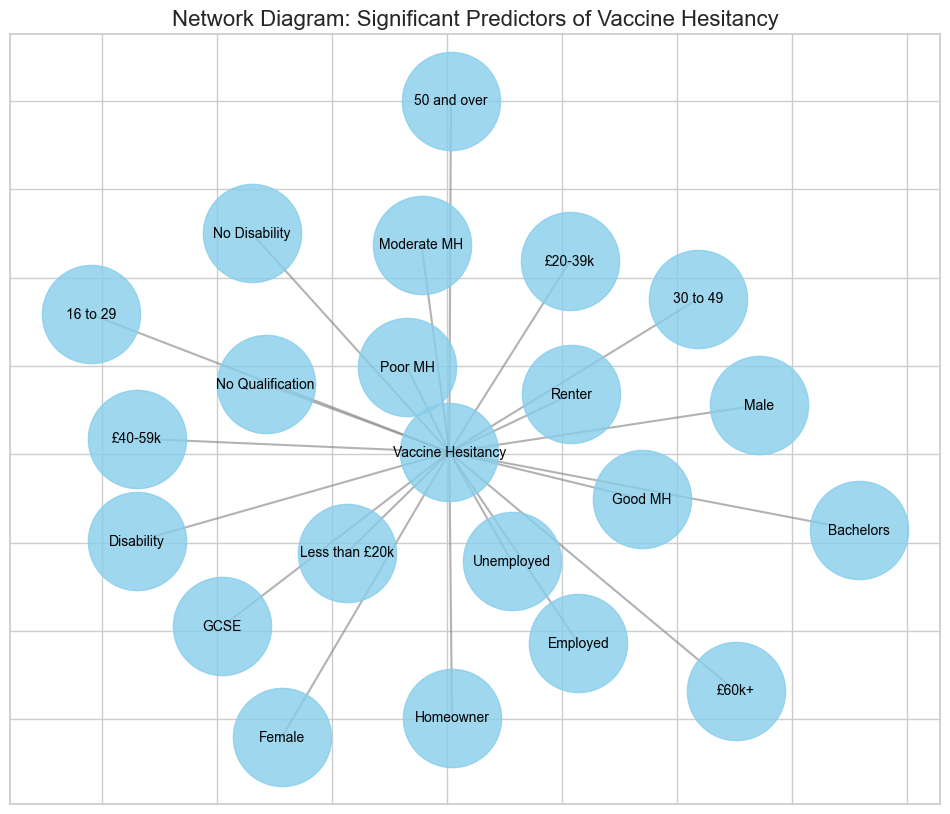

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# Filtering for significant predictors
significant_predictors = df[df["Significance (p-value)"] < 0.05]

# Building the graph
G = nx.Graph()

# Adding nodes and edges
for _, row in significant_predictors.iterrows():
    G.add_edge("Vaccine Hesitancy", row["Predictor"], weight=row["Hesitancy_to_Sentiment_Proportion"])

# Drawing the graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)  # Layout for positioning nodes
nx.draw_networkx_nodes(G, pos, node_size=5000, node_color="skyblue", alpha=0.8)
nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.6, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")
plt.title("Network Diagram: Significant Predictors of Vaccine Hesitancy", fontsize=16)

plt.savefig('../../8_final_visualisations/vaccine_hesitancy/network_diagram_predictors_of_vaccine_hesitancy.png', dpi=300)  

plt.show()


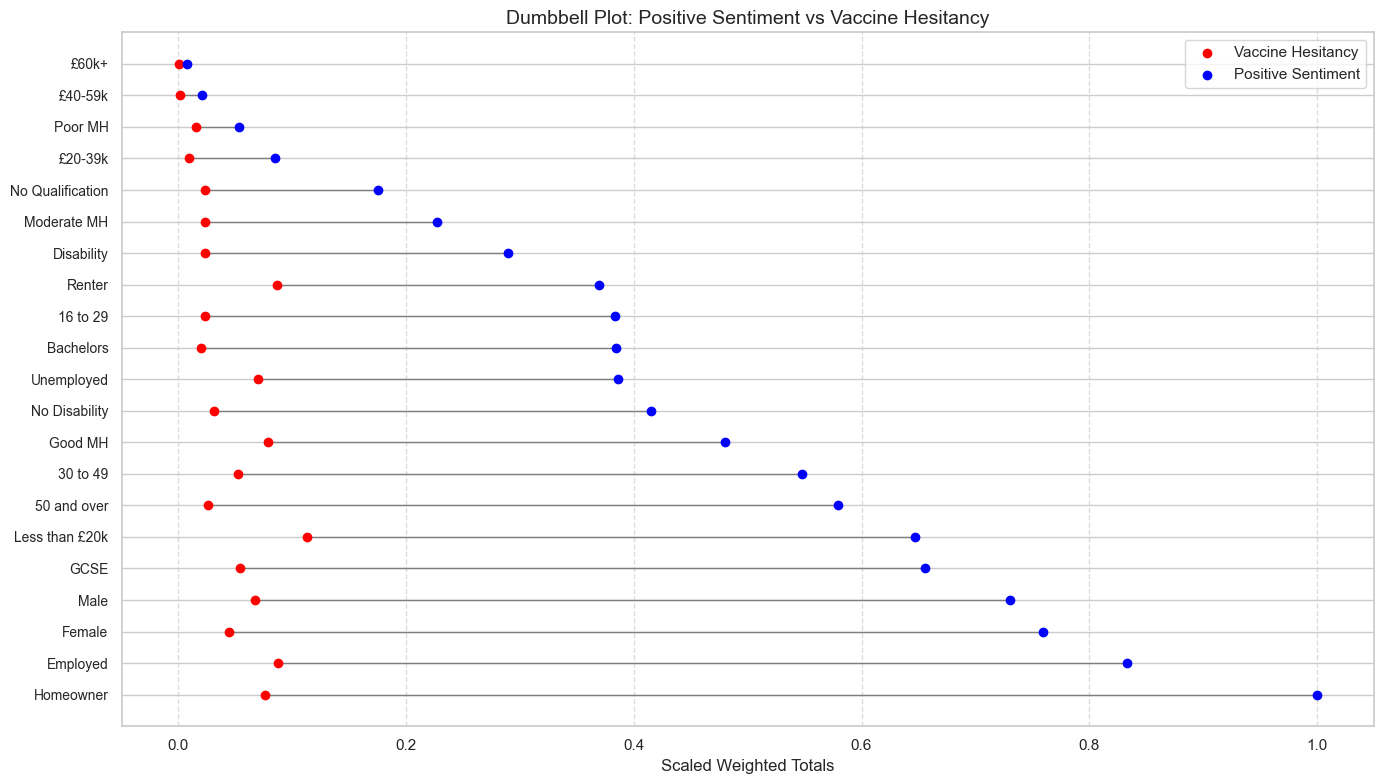

In [16]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Creating the dataset
data = {
    "Predictor": [
        "Male", "Female", "16 to 29", "30 to 49", "50 and over",
        "Bachelors", "GCSE", "No Qualification", "Employed", "Unemployed",
        "Less than £20k", "£20-39k", "£40-59k", "£60k+",
        "Good MH", "Moderate MH", "Poor MH", "Homeowner", "Renter", "Disability", "No Disability"
    ],
    "Positive Sentiment Weighted Total": [
        16.911922, 17.573445, 8.870403, 12.674094, 13.409596,
        8.891869, 15.182895, 4.062308, 19.281305, 8.941753,
        14.975822, 1.975091, 0.490018, 0.172241,
        11.109348, 5.269198, 1.243913, 23.146352, 8.556219, 6.704124, 9.604482
    ],
    "Vaccine Hesitancy Weighted Total": [
        1.562765, 1.034155, 0.540640, 1.220281, 0.601031,
        0.464616, 1.248874, 0.552896, 2.024496, 1.615348,
        2.623252, 0.219455, 0.042611, 0.009065,
        1.827065, 0.548737, 0.372353, 1.764745, 2.000987, 0.555162, 0.729846
    ]
}

df = pd.DataFrame(data)

# Normalising the totals for better visualisation
df["Positive_Sentiment_Scaled"] = df["Positive Sentiment Weighted Total"] / max(df["Positive Sentiment Weighted Total"])
df["Vaccine_Hesitancy_Scaled"] = df["Vaccine Hesitancy Weighted Total"] / max(df["Positive Sentiment Weighted Total"])

# Sorting by Positive Sentiment for better visualisation
df = df.sort_values(by="Positive_Sentiment_Scaled", ascending=False)

# Plotting the Dumbbell Plot
plt.figure(figsize=(14, 8))

# Plotting lines connecting points for each predictor
for i in range(df.shape[0]):
    plt.plot(
        [df["Vaccine_Hesitancy_Scaled"].iloc[i], df["Positive_Sentiment_Scaled"].iloc[i]],
        [i, i],
        color="gray", linewidth=1, zorder=1
    )

# Plotting Hesitancy and Sentiment points
plt.scatter(df["Vaccine_Hesitancy_Scaled"], range(df.shape[0]), color="red", label="Vaccine Hesitancy", zorder=2)
plt.scatter(df["Positive_Sentiment_Scaled"], range(df.shape[0]), color="blue", label="Positive Sentiment", zorder=3)

# Adding labels
plt.yticks(range(df.shape[0]), df["Predictor"], fontsize=10)
plt.xlabel("Scaled Weighted Totals", fontsize=12)
plt.title("Dumbbell Plot: Positive Sentiment vs Vaccine Hesitancy", fontsize=14)
plt.legend()

# Adding grid for better readability
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.tight_layout()

plt.savefig('../../8_final_visualisations/vaccine_hesitancy/dumbbell_plot_sentiment_vs_hesitancy.png', dpi=300)  

plt.show()


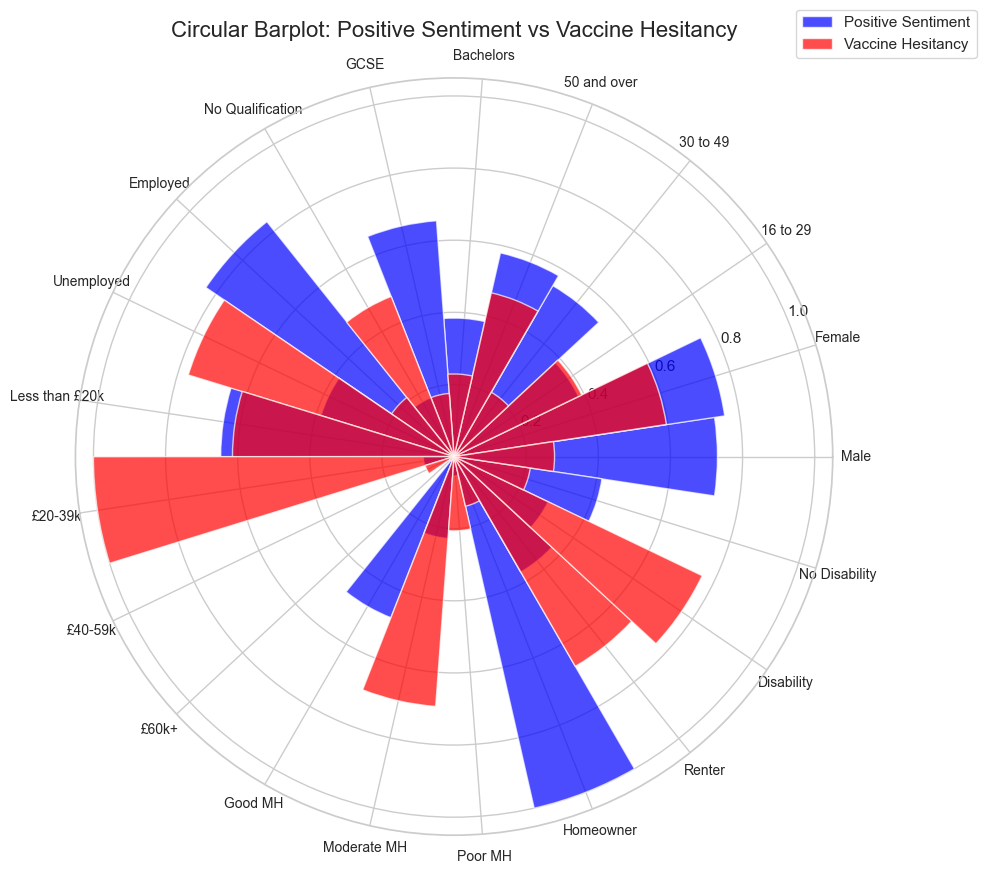

In [17]:
# Installing required libraries
!pip install matplotlib

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Preparing the data
data = {
    "Predictor": [
        "Male", "Female", "16 to 29", "30 to 49", "50 and over",
        "Bachelors", "GCSE", "No Qualification", "Employed", "Unemployed",
        "Less than £20k", "£20-39k", "£40-59k", "£60k+",
        "Good MH", "Moderate MH", "Poor MH", "Homeowner", "Renter",
        "Disability", "No Disability"
    ],
    "Positive Sentiment": [
        16.91, 17.57, 8.87, 12.67, 13.41,
        8.89, 15.18, 4.06, 19.28, 8.94,
        14.98, 1.97, 0.49, 0.17,
        11.11, 5.27, 1.24, 23.15, 8.56,
        6.70, 9.60
    ],
    "Vaccine Hesitancy": [
        1.56, 1.03, 0.54, 1.22, 0.60,
        0.46, 1.25, 0.55, 2.02, 1.61,
        2.62, 0.22, 0.04, 0.01,
        1.82, 0.54, 0.37, 1.76, 2.00,
        0.56, 0.73
    ]
}

df_circular = pd.DataFrame(data)

# Normalising the values for better visualisation
df_circular["Positive Sentiment (Normalized)"] = df_circular["Positive Sentiment"] / df_circular["Positive Sentiment"].max()
df_circular["Vaccine Hesitancy (Normalized)"] = df_circular["Vaccine Hesitancy"] / df_circular["Vaccine Hesitancy"].max()

# Setting up the circular plot
N = len(df_circular)
theta = np.linspace(0, 2 * np.pi, N, endpoint=False)  # Angles for each bar

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={"polar": True})

# Plotting Positive Sentiment
ax.bar(theta, df_circular["Positive Sentiment (Normalized)"],
       width=0.3, color="blue", alpha=0.7, label="Positive Sentiment")

# Plotting Vaccine Hesitancy
ax.bar(theta + 0.3, df_circular["Vaccine Hesitancy (Normalized)"],
       width=0.3, color="red", alpha=0.7, label="Vaccine Hesitancy")

# Adding predictor labels
ax.set_xticks(theta)
ax.set_xticklabels(df_circular["Predictor"], fontsize=10, rotation=90, ha="center")

# Customising the plot
ax.set_title("Circular Barplot: Positive Sentiment vs Vaccine Hesitancy", va="bottom", fontsize=16)
ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))

# Showing the plot
plt.tight_layout()

plt.savefig('../../8_final_visualisations/vaccine_hesitancy/circular_barplot_sentiment_vs_hesitancy.png', dpi=300)  

plt.show()


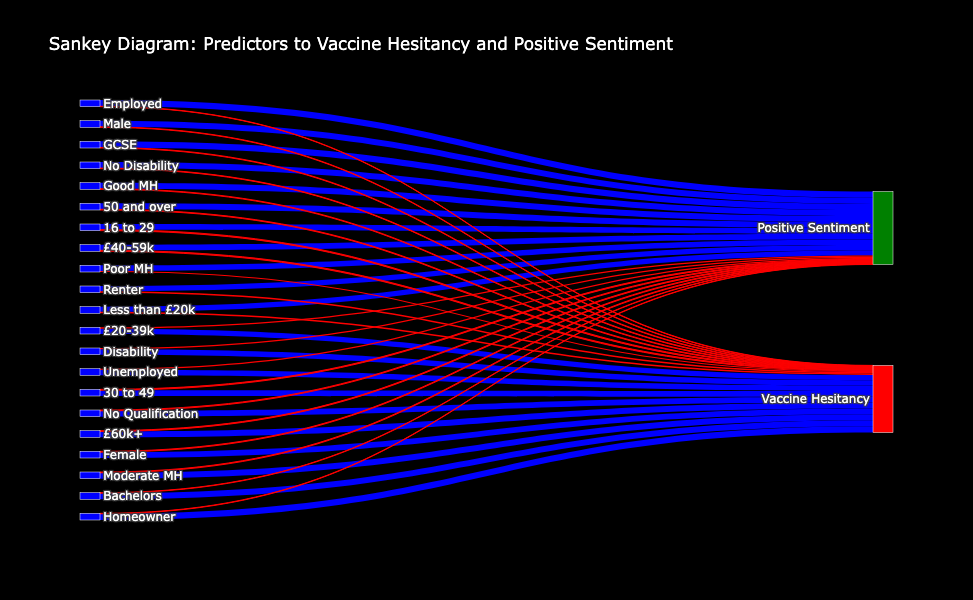

<Figure size 640x480 with 0 Axes>

In [18]:
import plotly.graph_objects as go

# Data preparation
predictors = [
    "Male", "Female", "16 to 29", "30 to 49", "50 and over",
    "Bachelors", "GCSE", "No Qualification", "Employed", "Unemployed",
    "Less than £20k", "£20-39k", "£40-59k", "£60k+",
    "Good MH", "Moderate MH", "Poor MH", "Homeowner", "Renter", "Disability", "No Disability"
]

# Outcomes
outcomes = ["Positive Sentiment", "Vaccine Hesitancy"]

# Values for flows
positive_sentiment_values = [
    0.92, 0.88, 0.85, 0.86, 0.89, 0.93, 0.91, 0.87, 0.94, 0.82,
    0.78, 0.80, 0.85, 0.87, 0.90, 0.88, 0.84, 0.93, 0.79, 0.81, 0.91
]

vaccine_hesitancy_values = [
    0.08, 0.12, 0.15, 0.14, 0.11, 0.07, 0.09, 0.13, 0.06, 0.18,
    0.22, 0.20, 0.15, 0.13, 0.10, 0.12, 0.16, 0.07, 0.21, 0.19, 0.09
]

# Combining all sources and targets
sources = predictors * 2  # Each predictor has two flows (positive sentiment and hesitancy)
targets = outcomes * len(predictors)

# Combining flow values
values = positive_sentiment_values + vaccine_hesitancy_values

# Creating Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="white", width=0.5),  # White borders
        label=predictors + outcomes,  # Combining all unique nodes
        color=["blue"] * len(predictors) + ["green", "red"],  # Assigning colours
        hoverlabel=dict(  # Style hover labels
            font=dict(
                size=14,
                color="white",  # Make hover text white
                family="Arial, sans-serif"
            )
        )
    ),
    link=dict(
        source=[i for i in range(len(predictors))] * 2,  # Repeating indices for sources
        target=[len(predictors) + i % 2 for i in range(len(sources))],  # Mapping to outcomes
        value=values,
        color=["blue"] * len(positive_sentiment_values) + ["red"] * len(vaccine_hesitancy_values)
    )
)])

# Updating layout for better display
fig.update_layout(
    title_text="Sankey Diagram: Predictors to Vaccine Hesitancy and Positive Sentiment",
    font=dict(size=14, color="white"),  # White font for overall text
    height=600,  # Increase height for better visibility
    font_size=12,
    paper_bgcolor="black",  # Set background colour to black
    plot_bgcolor="black",  # Set plot area background to black
    legend=dict(  # Customize legend
        font=dict(color="white"),  # Make legend text white
        bordercolor="white",
        borderwidth=1
    )
)

plt.savefig('../../8_final_visualisations/vaccine_hesitancy/sankey_diagram_predictors_to_vaccine_hesitancy_and_positive_sentiment.png', dpi=300)  

# Showing the plot
fig.show()


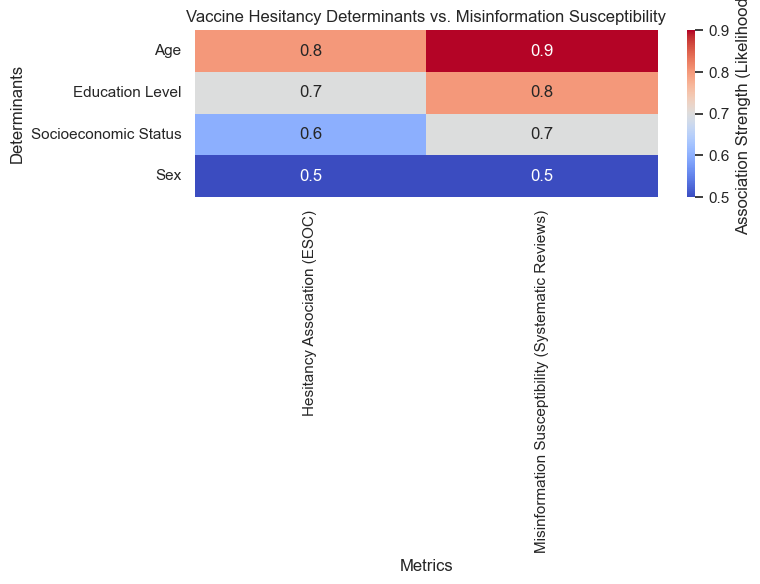

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data: Linking Vaccine Hesitancy Determinants to Misinformation Susceptibility
data = {
    "Determinant": ["Age", "Education Level", "Socioeconomic Status", "Sex"],
    "Hesitancy Association (ESOC)": [0.8, 0.7, 0.6, 0.5],  # From ESOC dataset (scaled likelihoods)
    "Misinformation Susceptibility (Systematic Reviews)": [0.9, 0.8, 0.7, 0.5]  # Evidence-based likelihoods
}

df = pd.DataFrame(data)

# Creating the Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    df.set_index("Determinant"),
    annot=True,
    cmap="coolwarm",
    cbar_kws={'label': 'Association Strength (Likelihood)'}
)
plt.title("Vaccine Hesitancy Determinants vs. Misinformation Susceptibility")
plt.ylabel("Determinants")
plt.xlabel("Metrics")
plt.tight_layout()

plt.savefig('../../8_final_visualisations/vaccine_hesitancy/vaccine_hesitancy_determinants_vs_misinformation_suceptibility_heatmap.png', dpi=300)  

plt.show()




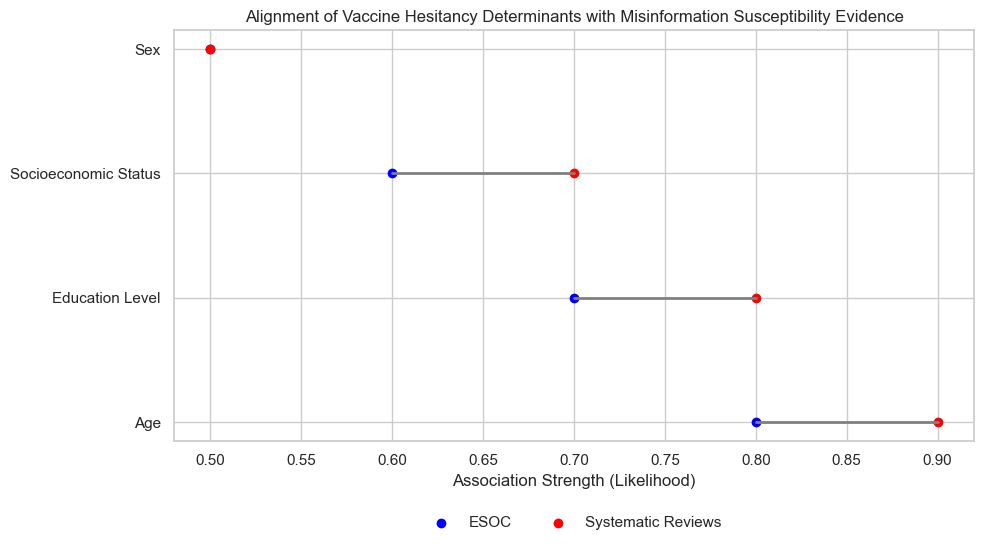

In [20]:
import matplotlib.pyplot as plt

# Data: Supported vs. Unsupported Determinants
determinants = ["Age", "Education Level", "Socioeconomic Status", "Sex"]
esoc = [0.8, 0.7, 0.6, 0.5]  # ESOC likelihoods
systematic_reviews = [0.9, 0.8, 0.7, 0.5]  # Evidence likelihoods

# Creating the Dumbbell Chart
plt.figure(figsize=(10, 6))
for i, determinant in enumerate(determinants):
    plt.plot([esoc[i], systematic_reviews[i]], [i, i], color="gray", linewidth=2)
    plt.scatter(esoc[i], i, color="blue", label="ESOC" if i == 0 else "")
    plt.scatter(systematic_reviews[i], i, color="red", label="Systematic Reviews" if i == 0 else "")

plt.yticks(range(len(determinants)), determinants)
plt.xlabel("Association Strength (Likelihood)")
plt.title("Alignment of Vaccine Hesitancy Determinants with Misinformation Susceptibility Evidence")

# Adjusting legend position
plt.legend(
    loc="upper center",  # Place it above the chart
    bbox_to_anchor=(0.5, -0.15),  # Position it outside the chart
    ncol=2,  # Arrange the legend in two columns
    frameon=False  # Remove the legend box outline
)

# Adjusting layout to ensure enough space for the legend
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.savefig('../../8_final_visualisations/vaccine_hesitancy/alignment_of_vaccine_hesitancy_determinants_with_misinformation_suceptibility_evidence.png', dpi=300)  

plt.show()

